In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
%matplotlib inline

In [3]:
plt.style.use('court.mplstyle')

In [21]:
highmass_rc_newvals = pd.read_csv('../datatables/highmass_rc_newvals.csv')
highmass_rc_newvals

,KIC,numax,pysyd_numax,e_pysyd_numax,new_numax,smooth_numax,Delnu,pysyd_dnu,e_pysyd_dnu,o_Teff,...,a_log(g),a_log(g)_e,a_[Fe/H],a_[Fe/H]_e,L_Teff,L_Teff_e,L_log(g),L_log(g)_e,L_[Fe/H],L_[Fe/H]_e
0,3347458,39.99,40.291621,0.904390,40.32,41.422682,3.360,3.362861,0.016179,5000,...,2.525,0.039,0.165,0.007,NaN,NaN,NaN,NaN,NaN,NaN
1,8378545,48.82,47.769061,1.989659,48.07,48.952072,3.952,3.966159,0.022203,5058,...,3.142,0.059,0.157,0.007,5009.00,32.00,2.761,0.053,0.323,0.030
2,5978324,49.10,48.776551,0.974408,48.78,50.072904,4.024,4.072667,0.016443,5051,...,2.701,0.050,-0.098,0.008,NaN,NaN,NaN,NaN,NaN,NaN
3,10068490,66.42,58.662513,1.977989,58.84,60.906533,5.206,5.239133,0.046630,5189,...,2.769,0.062,-0.201,0.010,5254.75,37.05,2.699,0.061,-0.216,0.035
4,4756133,80.81,80.362852,2.357250,80.29,83.967767,5.865,5.998605,0.022750,5152,...,3.014,0.056,0.091,0.008,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10162765,88.56,85.502602,2.118024,85.53,89.092562,6.760,6.801791,0.023959,4948,...,2.858,0.049,0.076,0.008,5099.89,22.44,2.974,0.034,0.085,0.018
111,3430048,35.82,33.626875,2.147042,33.63,37.856607,3.487,3.518327,0.034631,5079,...,2.502,0.039,0.106,0.007,NaN,NaN,NaN,NaN,NaN,NaN
112,7116721,50.86,50.988298,1.581224,50.97,53.768334,4.522,4.514956,0.013743,5028,...,NaN,NaN,NaN,NaN,4798.39,26.51,2.677,0.044,0.049,0.025
113,7347076,90.59,90.713242,1.757715,90.65,94.236618,7.216,7.217619,0.034534,5386,...,NaN,NaN,NaN,NaN,5076.47,46.21,2.915,0.076,-0.007,0.044


In [36]:
highmass_rc = pd.read_csv('../datatables/highmass_rc_werr.csv')
highmass_rc

,KIC,Kpmag,QLen,DLen,numax,e_numax,Delnu,e_Delnu,A,Width,...,e_RGBcorR,ClcorM,e_ClcorM,ClcorR,e_ClcorR,Phase,M17,Simbad,_RA,_DE
0,3347458,10.30,17,1235.8,39.99,1.77,3.360,0.020,39.7,17.4,...,1.05,5.24,0.78,20.87,1.06,2,M17,Simbad,292.77283,38.432480
1,8378545,11.78,17,1235.5,48.82,4.01,3.977,0.040,23.0,22.9,...,1.57,4.90,1.24,18.21,1.57,2,M17,Simbad,296.26709,44.371861
2,5978324,10.96,18,1318.1,49.10,0.80,4.074,0.023,23.5,17.6,...,0.45,4.70,0.33,17.78,0.46,2,M17,Simbad,296.65195,41.222080
3,10068490,12.26,18,1317.7,66.42,5.52,5.206,0.076,13.7,19.1,...,1.32,4.61,1.20,15.04,1.35,2,M17,Simbad,289.05295,47.040981
4,4756133,10.58,14,974.9,80.81,2.22,5.994,0.030,19.9,31.3,...,0.45,4.51,0.43,13.51,0.45,2,M17,Simbad,294.38312,39.844940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10162765,11.12,15,1055.8,88.56,1.62,6.795,0.032,21.1,33.4,...,0.29,3.02,0.23,10.67,0.29,2,M17,Simbad,298.81076,47.142471
111,3430048,12.06,8,557.6,35.82,1.05,3.487,0.095,62.5,17.1,...,1.09,3.01,0.45,16.64,1.08,2,M17,Simbad,287.31088,38.598862
112,7116721,13.38,18,1317.9,50.86,1.45,4.522,0.017,48.4,20.8,...,0.49,3.01,0.31,14.00,0.50,2,M17,Simbad,291.45297,42.617050
113,7347076,13.66,17,1308.5,90.59,2.34,7.216,0.045,23.6,25.8,...,0.37,3.01,0.30,10.32,0.37,2,M17,Simbad,286.28159,42.939899


In [5]:
def read_star_hp(star_name,suppress_output=True,unpack=False):
    delta_nu = highmass_rc_newvals['pysyd_dnu'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    nu_max = highmass_rc_newvals['pysyd_numax'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    if suppress_output == False:
        print(star_name)
        print('delta_nu =',delta_nu)
        print('nu_max =',nu_max)
    
    lightcurve = pd.read_csv('../data/hpfiltered_LCs/KIC'+star_name[4:]+'_LC.csv')
    powerspec = pd.read_csv('../data/hpfiltered_LCs/KIC'+star_name[4:]+'_PS.csv')
    if unpack == True:
        if suppress_output == False:
            print('unpacking data frames')
        time = np.asarray(lightcurve['time'])
        flux = np.asarray(lightcurve['flux'])
        freq = np.asarray(powerspec['freq'])
        power = np.asarray(powerspec['power'])
        amp = np.asarray(powerspec['amp'])
        return delta_nu,nu_max,time,flux,freq,power,amp
    else:
        if suppress_output == False:
            print('returning dataframes')
        return delta_nu,nu_max,lightcurve,powerspec

In [25]:
def read_star_bdps(star_name,suppress_output=True,unpack=False):
    delta_nu = highmass_rc_newvals['pysyd_dnu'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    nu_max = highmass_rc_newvals['pysyd_numax'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    if suppress_output == False:
        print(star_name)
        print('delta_nu =',delta_nu)
        print('nu_max =',nu_max)
    
    lightcurve = pd.read_csv('../data/hpfiltered_LCs/KIC'+star_name[4:]+'_LC.csv')
    powerspec = pd.read_csv('../data/pysyd_bdps/'+star_name[4:]+'_BDPS.txt', 
                            delimiter='\s+', names=['freq','power'])
    if unpack == True:
        if suppress_output == False:
            print('unpacking data frames')
        time = np.asarray(lightcurve['time'])
        flux = np.asarray(lightcurve['flux'])
        freq = np.asarray(powerspec['freq'])
        power = np.asarray(powerspec['power'])
        amp = np.asarray(powerspec['amp'])
        return delta_nu,nu_max,time,flux,freq,power,amp
    else:
        if suppress_output == False:
            print('returning dataframes')
        return delta_nu,nu_max,lightcurve,powerspec

In [6]:
def yl_echelle(x, y, period, fmin=None, fmax=None, echelletype="single", offset=0.0):
    '''
    Make an echelle plot used in asteroseismology.
    
    Input parameters
    ----
    x: 1d array-like, freq
    y: 1d array-like, power spectrum
    period: float, length of each vertical stack (Dnu in a frequency echelle, DPi in a period echelle)
    fmin: float, minimum frequency to be plotted
    fmax: float, maximum frequency to be plotted
    echelletype: str, `single` or `replicated`
    offset: float, an amount by which the diagram is shifted horizontally
    
    Return
    ----
    z: a 2d numpy.array, folded power spectrum
    extent: a list, edges (left, right, bottom, top) 
    
    Users can create an echelle diagram with the following command:
    ----
    
    import matplotlib.pyplot as plt
    z, ext = echelle(freq, power, Dnu, fmin=numax-4*Dnu, fmax=numax+4*Dnu)
    plt.imshow(z, extent=ext, aspect='auto', interpolation='nearest')
    
    '''
    
    if fmin is None: fmin=0.
    if fmax is None: fmax=np.nanmax(x)

    fmin = fmin - offset
    fmax = fmax - offset
    x = x - offset

    fmin = 0.0 if fmin<0. else fmin - (fmin % period)

    # define plotting elements
    resolution = np.median(np.diff(x))
    # number of vertical stacks
    n_stack = int((fmax-fmin)/period) 
    # number of point per stack
    n_element = int(period/resolution) 

    fstart = fmin - (fmin % period)
    
    z = np.zeros([n_stack, n_element])
    base = np.linspace(0, period, n_element) if echelletype=='single' else np.linspace(0, 2*period, n_element)
    for istack in range(n_stack):
        z[-istack-1,:] = np.interp(fmin+istack*period+base, x, y)
    
    extent = (0, period, fstart, fstart+n_stack*period) if echelletype=='single' else (0, 2*period, fstart, fstart+n_stack*period)
        
    return z, extent

In [7]:
def echelle_wrapper(freq,power,dnu,fmin,fmax,smooth_percent=0.02):
    fig,ax = plt.subplots(figsize=(8,8))
#     ax1 = fig.add_subplot(111)
    freq_res = np.median(np.diff(freq))
    power = convolve(power, Box1DKernel((dnu*smooth_percent)/freq_res))
#     z, ext = yl_echelle(freq,power,dnu,fmin,fmax, echelletype="replicated")
    z, ext = yl_echelle(freq, power, dnu, fmin=fmin, fmax=fmax, echelletype="replicated")
    z = np.sqrt(z) #sqrt scaling
    ax.imshow(z, extent=ext, aspect='auto', interpolation='nearest', cmap='BuPu')
#     ax.imshow(echz,aspect="auto",
#               extent=(echx.min(), echx.max(), echy.min(), echy.max()),
#               origin="lower",cmap='BuPu')
    ax.axvline(dnu,color='grey',linestyle='--',alpha=0.5)
    ax.set_xlabel("Frequency mod "+str("{0:.3f}").format(dnu) + " ($\mu$Hz)")

In [8]:
from ipywidgets import interact, IntSlider, FloatSlider, fixed
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel

KIC 3347458
delta_nu = 3.362860546
nu_max = 40.29162051
returning dataframes


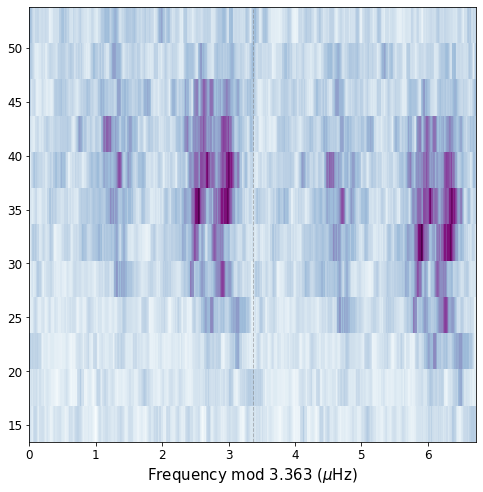

KIC 8378545
delta_nu = 3.966159149
nu_max = 47.76906119
returning dataframes


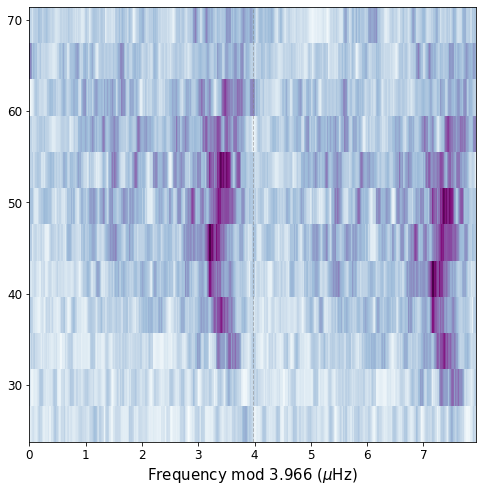

KIC 5978324
delta_nu = 4.072666568
nu_max = 48.77655086
returning dataframes


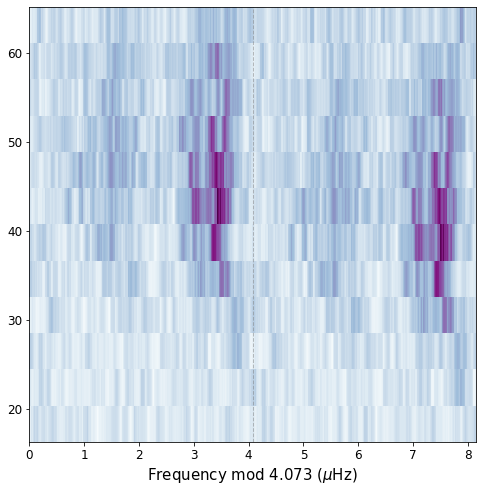

KIC 10068490
delta_nu = 5.239133186
nu_max = 58.662513
returning dataframes


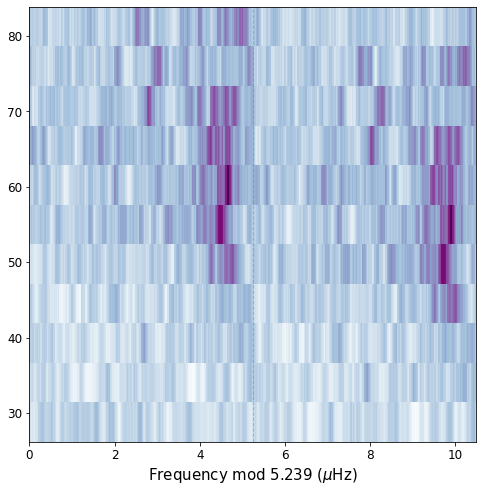

KIC 4756133
delta_nu = 5.998605309
nu_max = 80.36285179
returning dataframes


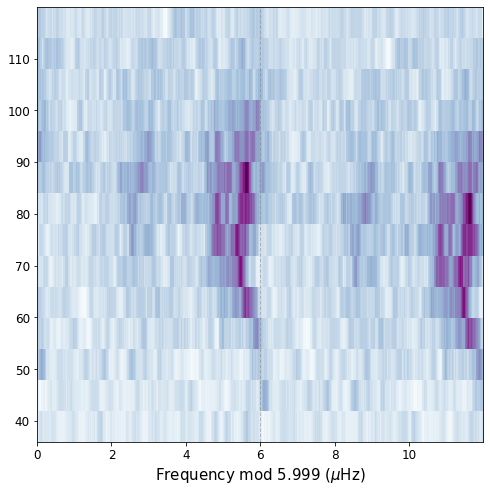

KIC 7175316
delta_nu = 3.730428817
nu_max = 41.48800726
returning dataframes


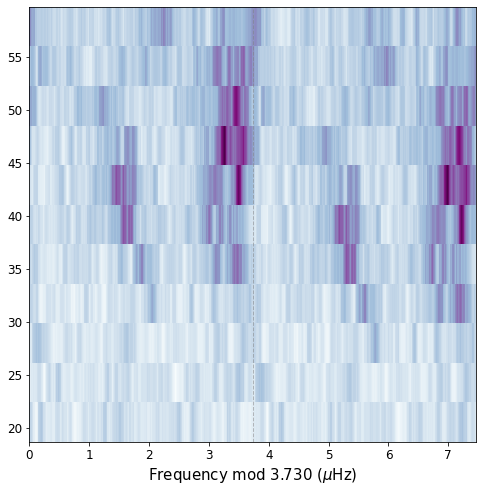

KIC 7024018
delta_nu = 6.639096698
nu_max = 80.55175094
returning dataframes


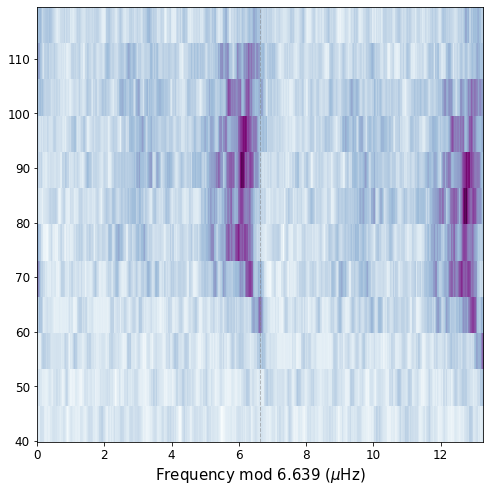

KIC 6547176
delta_nu = 4.086520875
nu_max = 43.03859571
returning dataframes


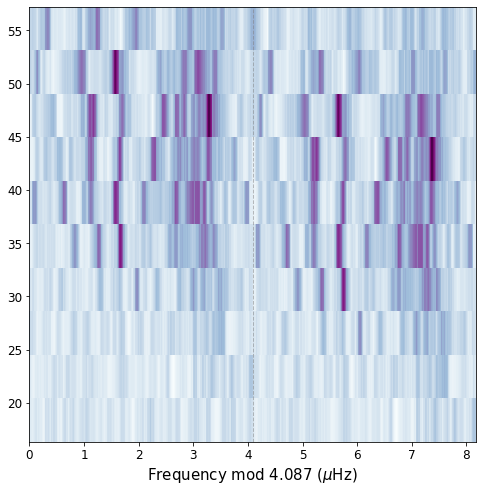

KIC 8621290
delta_nu = 5.425330358
nu_max = 64.8569874
returning dataframes


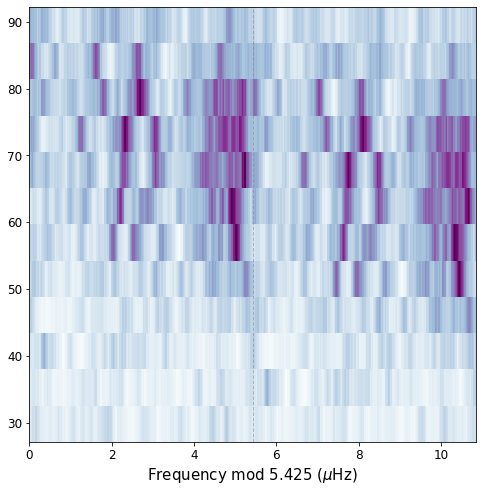

KIC 10384595
delta_nu = 4.764084258
nu_max = 47.58802372
returning dataframes


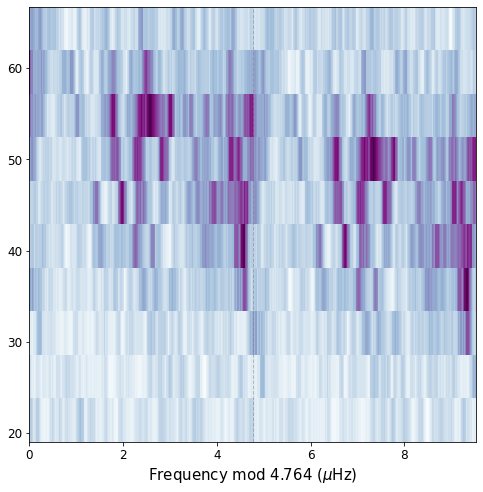

KIC 6599955
delta_nu = 5.870093442
nu_max = 75.7110906
returning dataframes


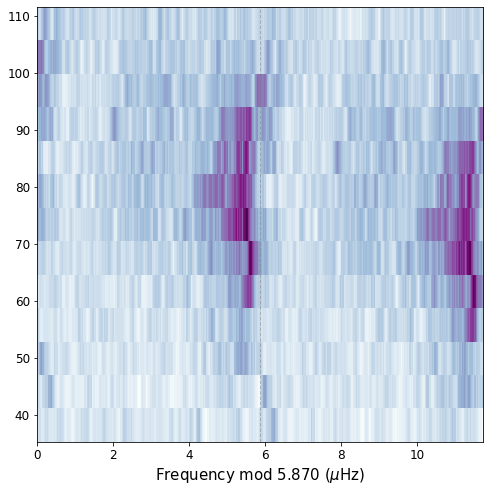

KIC 3955502
delta_nu = 2.516170954
nu_max = 24.71456259
returning dataframes


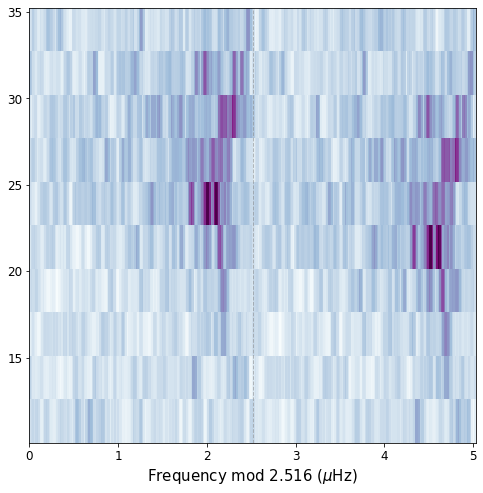

KIC 8037930
delta_nu = 4.776809297
nu_max = 54.42168115
returning dataframes


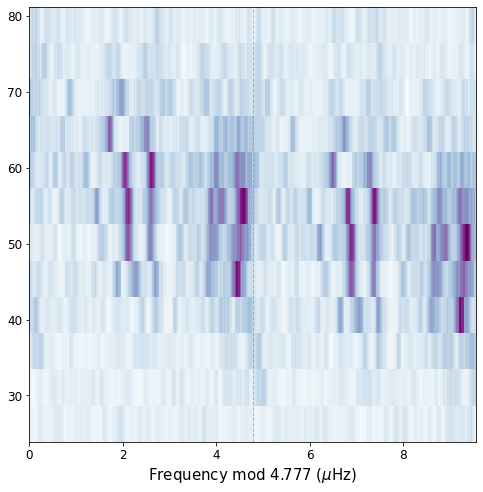

KIC 8569885
delta_nu = 4.024211373
nu_max = 44.92763217
returning dataframes


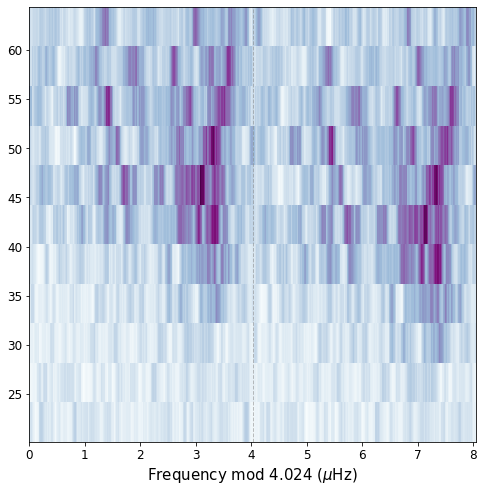

KIC 3747623
delta_nu = 4.317942932
nu_max = 29.27027048
returning dataframes


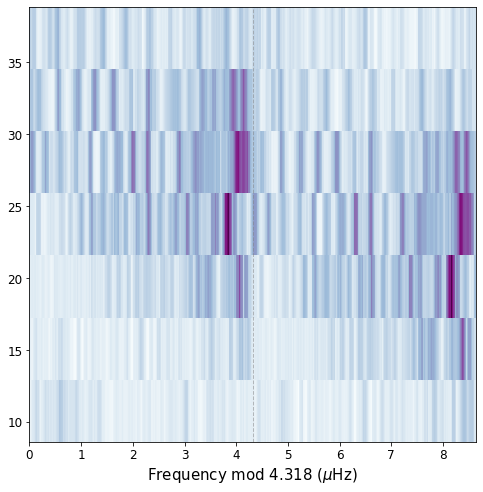

KIC 6529078
delta_nu = 3.977589767
nu_max = 31.84270529
returning dataframes


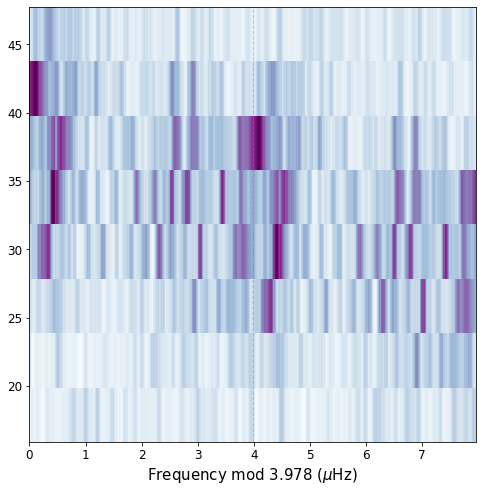

KIC 11518639
delta_nu = 4.610576558
nu_max = 56.14959081
returning dataframes


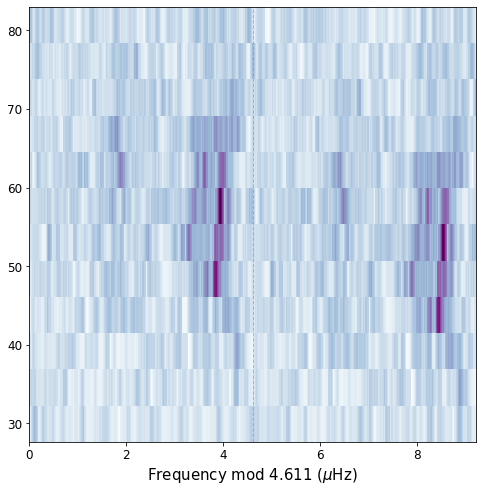

KIC 7988900
delta_nu = 4.127937976
nu_max = 47.73757795
returning dataframes


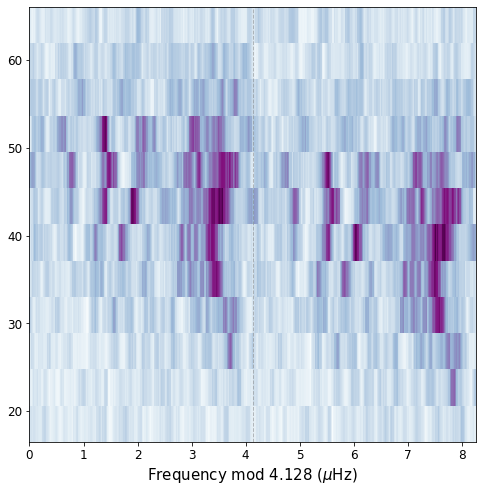

KIC 8365782
delta_nu = 6.298076484
nu_max = 78.48954909
returning dataframes


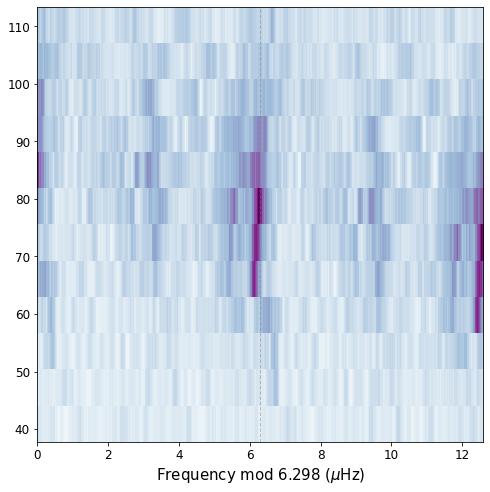

KIC 9612933
delta_nu = 4.432696858
nu_max = 52.46804315
returning dataframes


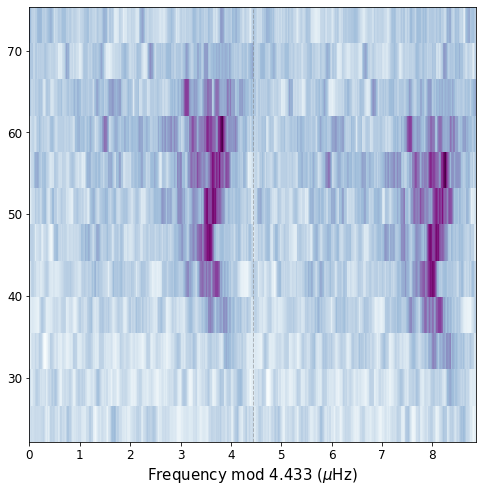

KIC 7971558
delta_nu = 2.877087941
nu_max = 28.10731901
returning dataframes


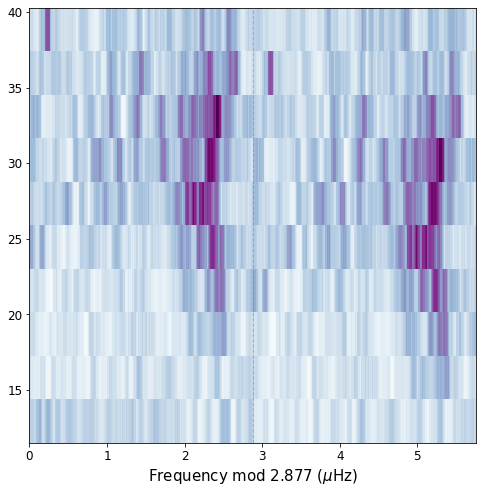

KIC 10547065
delta_nu = 3.790061265
nu_max = 40.83524324
returning dataframes


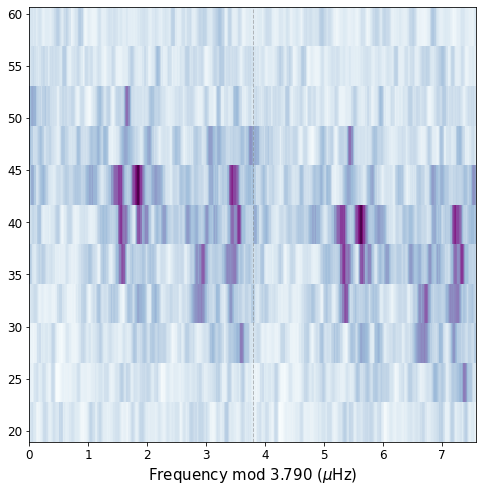

KIC 10094550
delta_nu = 4.844474207
nu_max = 56.47437803
returning dataframes


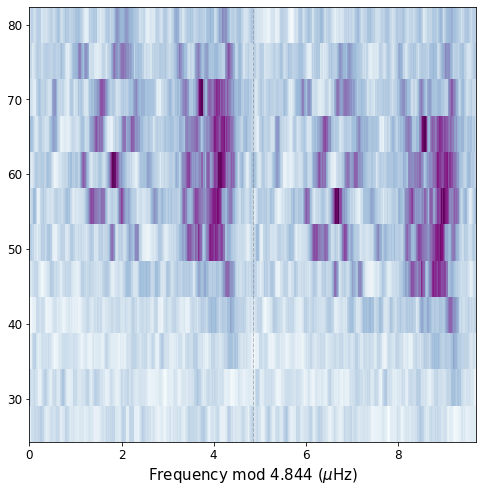

KIC 10736390
delta_nu = 5.80222533
nu_max = 71.81494249
returning dataframes


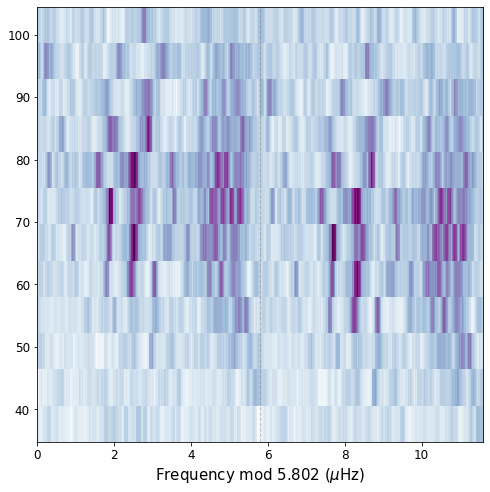

KIC 3758458
delta_nu = 5.875083557
nu_max = 67.04513044
returning dataframes


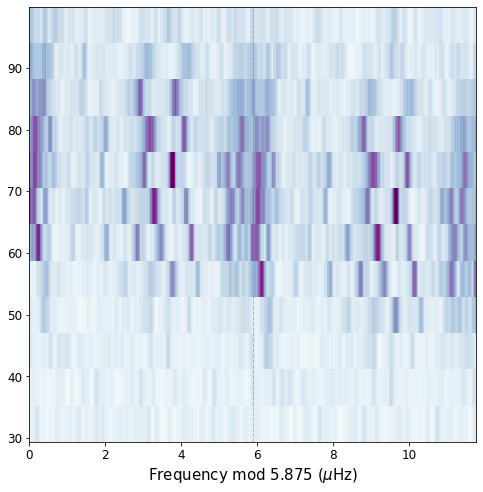

KIC 5564131
delta_nu = 3.631712456
nu_max = 37.89449266
returning dataframes


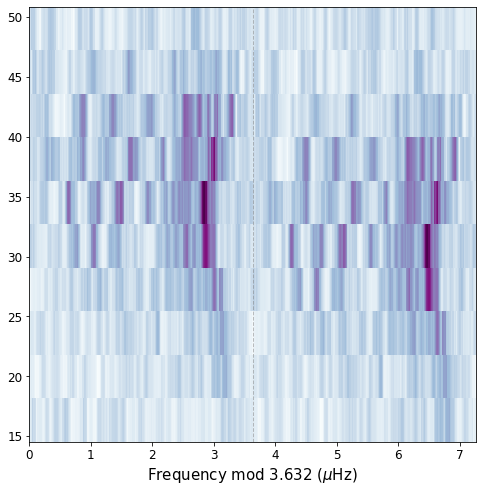

KIC 4370592
delta_nu = 4.420424226
nu_max = 50.02689728
returning dataframes


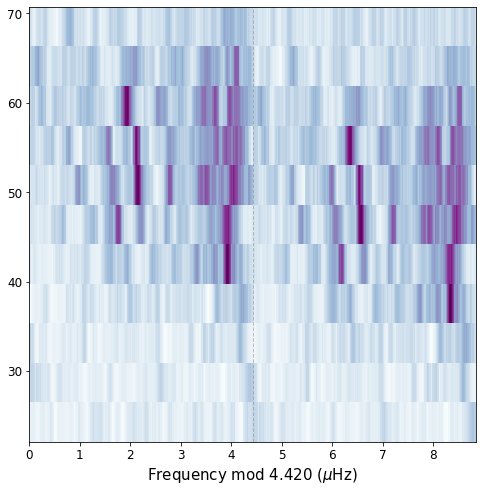

KIC 5097690
delta_nu = 4.989400844
nu_max = 59.04032742
returning dataframes


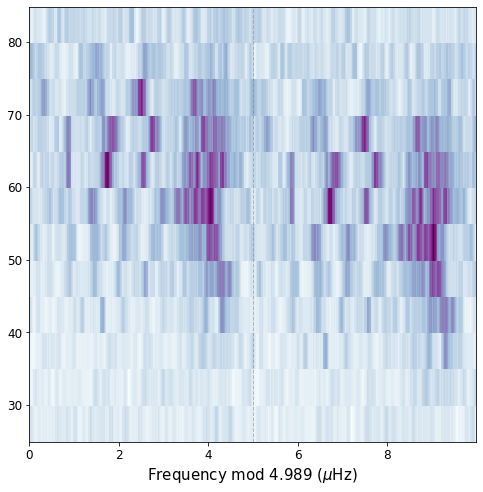

KIC 9286851
delta_nu = 6.627442492
nu_max = 85.49473209
returning dataframes


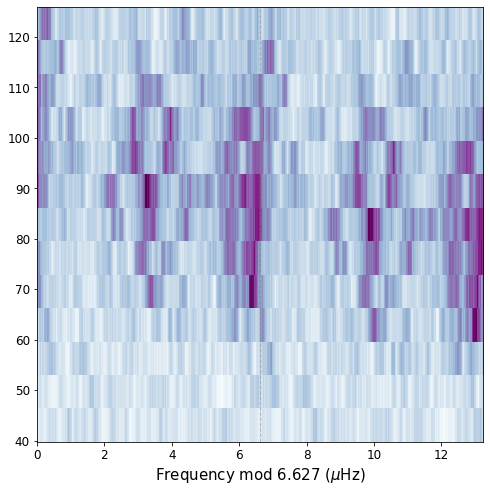

KIC 6866251
delta_nu = 7.199573895
nu_max = 94.23153966
returning dataframes


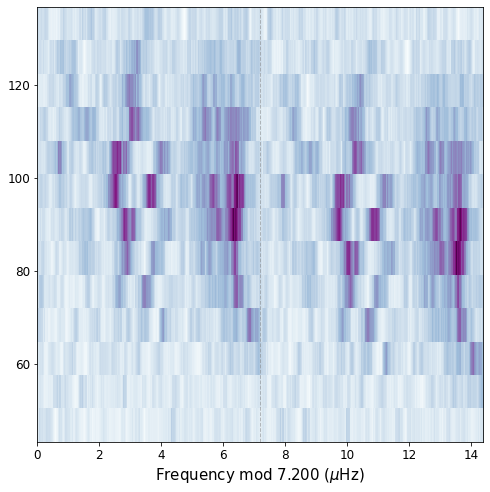

KIC 5106376
delta_nu = 5.191475262
nu_max = 61.69285281
returning dataframes


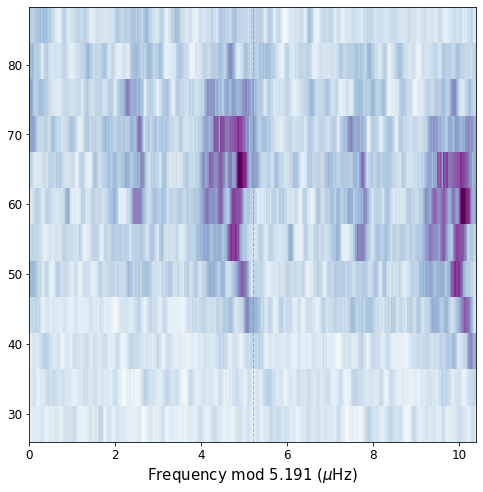

KIC 4562675
delta_nu = 5.40343515
nu_max = 65.28202648
returning dataframes


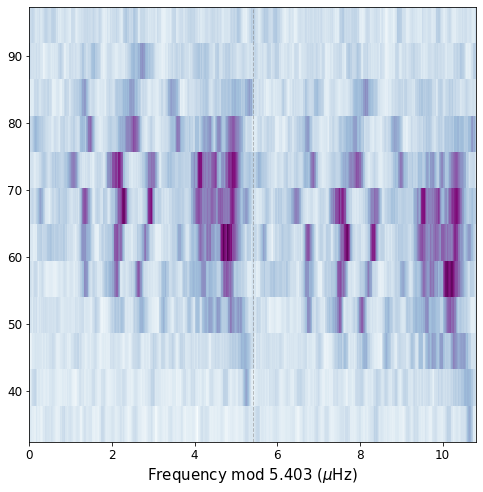

KIC 8525150
delta_nu = 5.660189659
nu_max = 71.68901144
returning dataframes


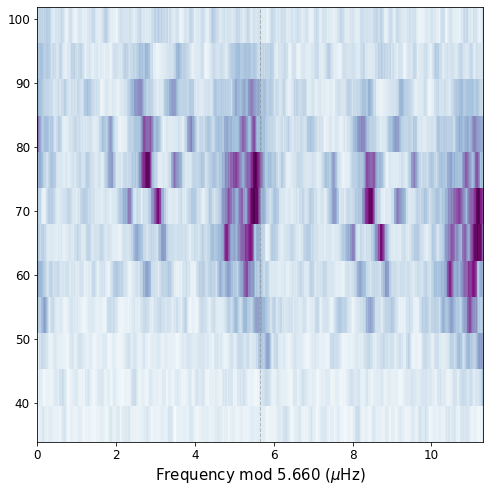

KIC 5631956
delta_nu = 4.774833095
nu_max = 49.4613275
returning dataframes


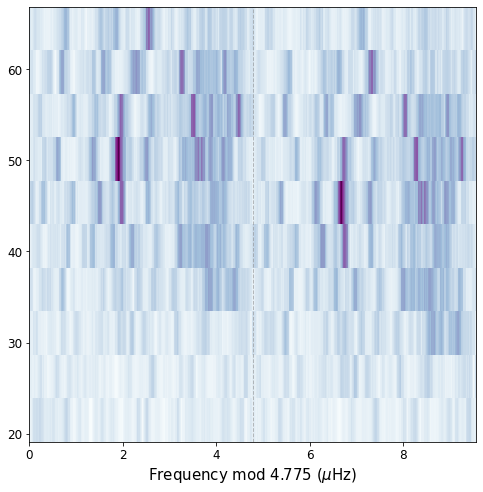

KIC 9245283
delta_nu = 3.866352639
nu_max = 42.31446186
returning dataframes


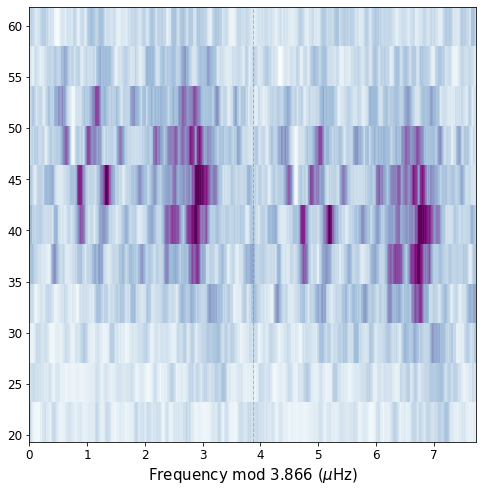

KIC 4059250
delta_nu = 5.018749079
nu_max = 57.23787078
returning dataframes


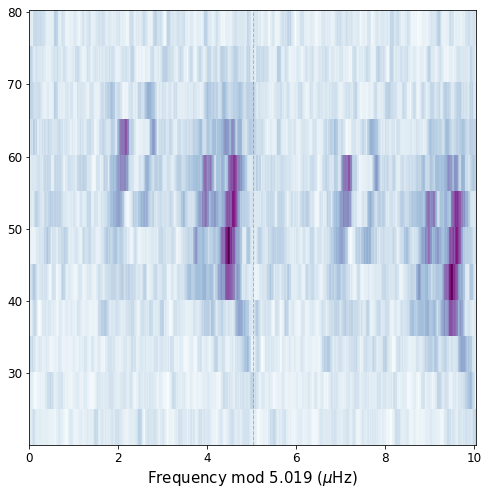

KIC 10322513
delta_nu = 7.174200746
nu_max = 92.29526485
returning dataframes


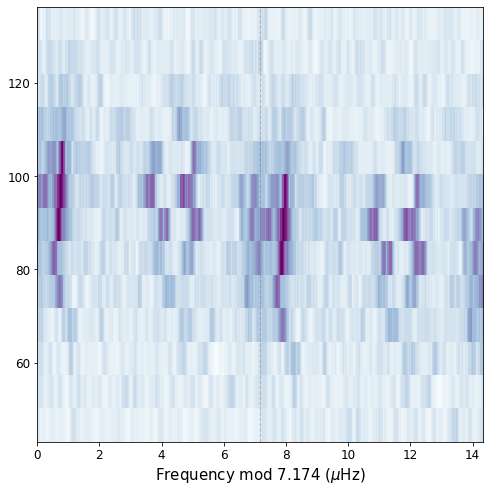

KIC 3120567
delta_nu = 5.419966961
nu_max = 65.17183398
returning dataframes


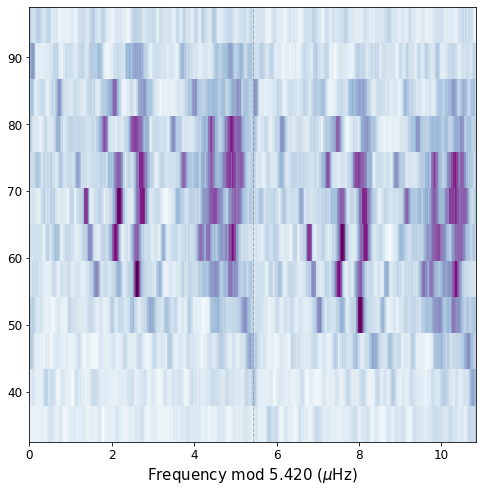

KIC 11234897
delta_nu = 5.189995261
nu_max = 58.85928554
returning dataframes


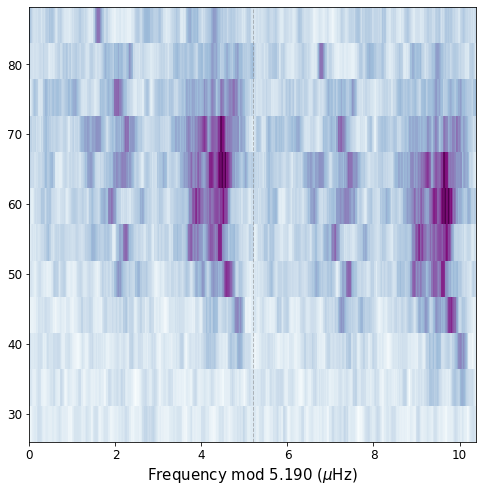

KIC 11297585
delta_nu = 3.31135704
nu_max = 33.75868941
returning dataframes


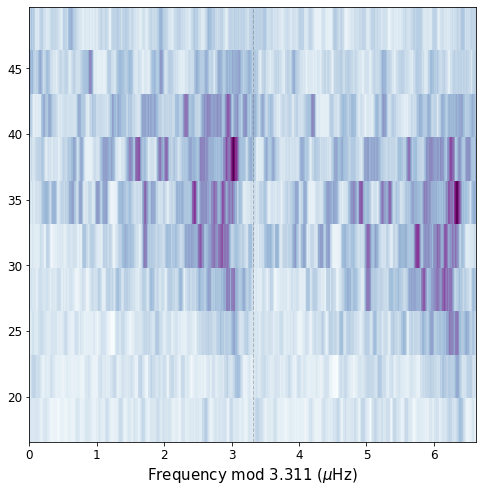

KIC 4940439
delta_nu = 5.798200854
nu_max = 72.23998574
returning dataframes


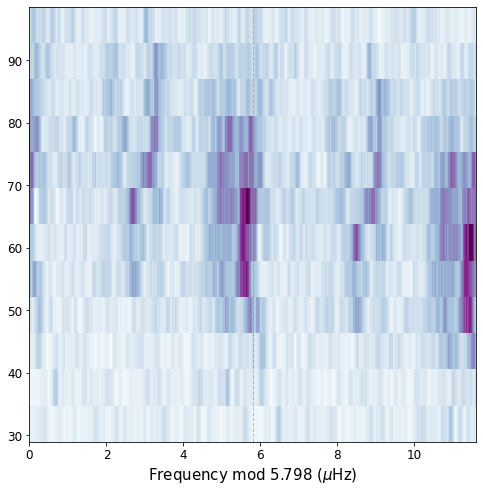

KIC 5307930
delta_nu = 4.472398231
nu_max = 51.20868891
returning dataframes


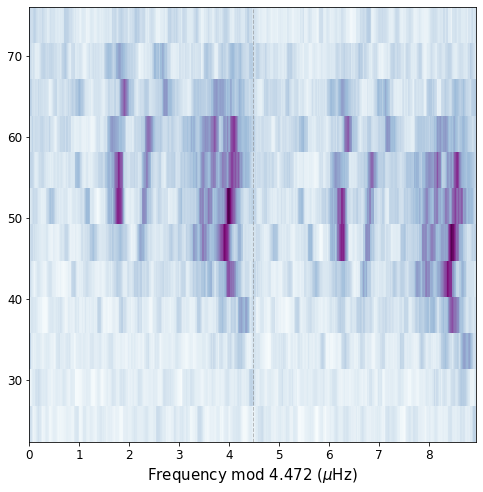

KIC 6438046
delta_nu = 3.052111287
nu_max = 31.34229796
returning dataframes


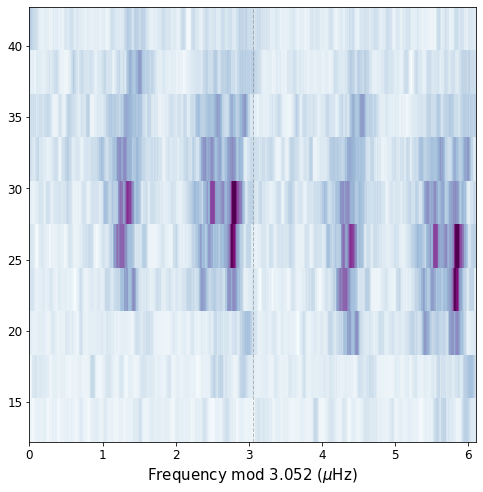

KIC 4348593
delta_nu = 5.154709108
nu_max = 61.7007231
returning dataframes


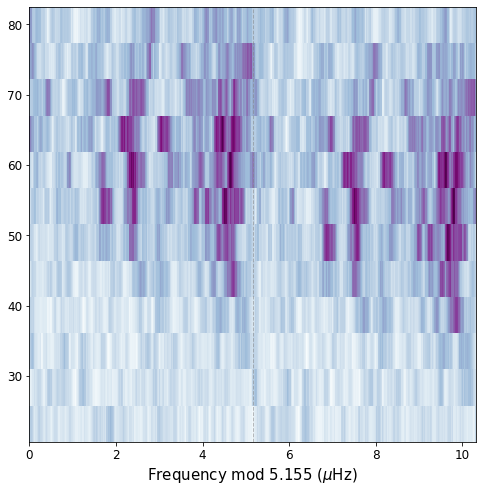

KIC 5731004
delta_nu = 6.451839073
nu_max = 81.13121643
returning dataframes


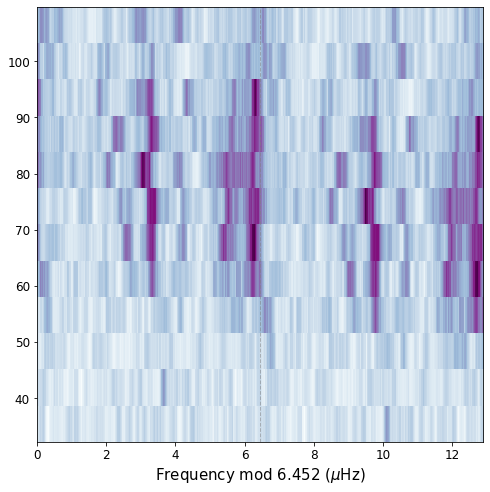

KIC 5734092
delta_nu = 5.135329493
nu_max = 60.61898319
returning dataframes


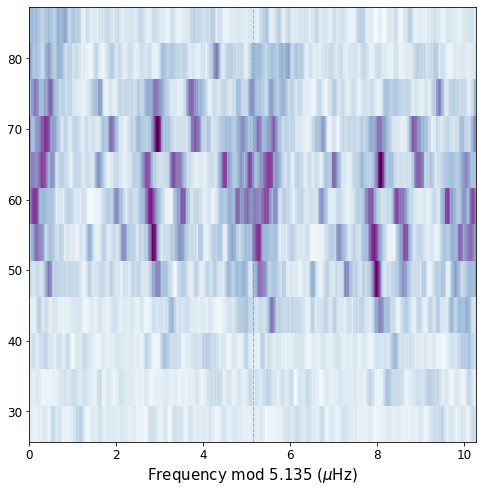

KIC 11235672
delta_nu = 5.971
nu_max = 73.81417244
returning dataframes


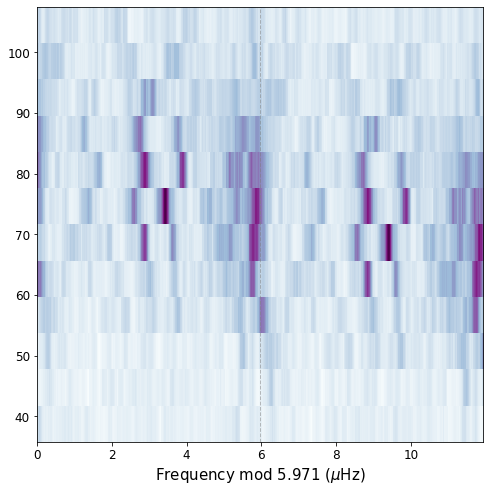

KIC 8230626
delta_nu = 7.942448123
nu_max = 109.6190669
returning dataframes


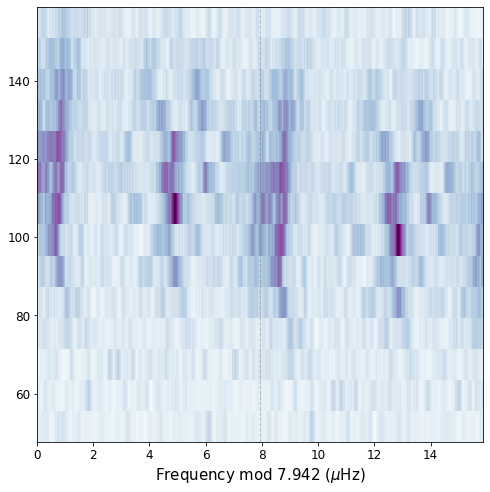

KIC 10600807
delta_nu = 4.92562089
nu_max = 53.30236636
returning dataframes


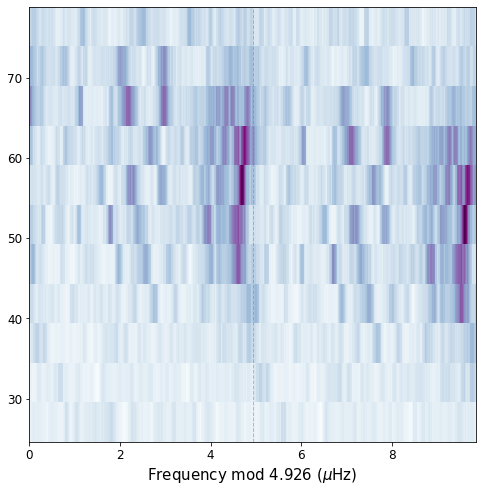

KIC 5080332
delta_nu = 6.742545102
nu_max = 84.33588972
returning dataframes


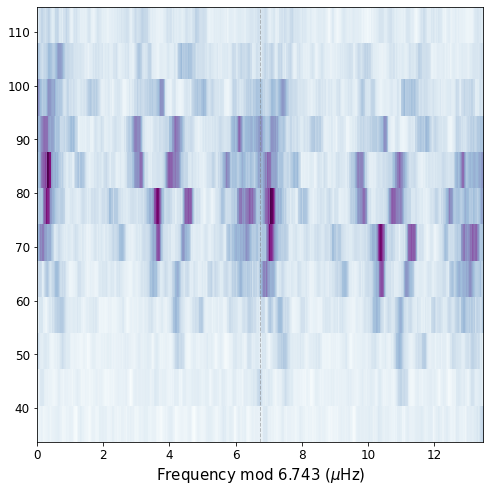

KIC 5531488
delta_nu = 7.970565236
nu_max = 103.4887592
returning dataframes


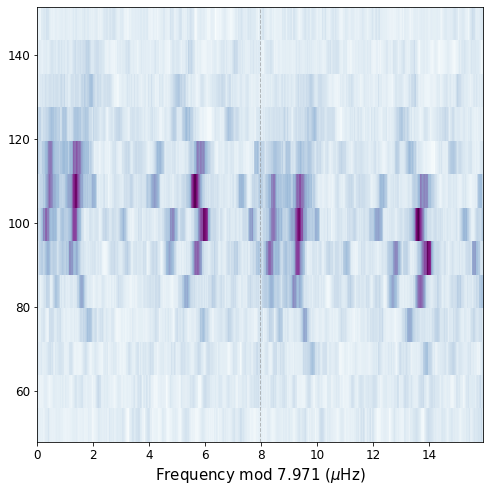

KIC 11413158
delta_nu = 5.003002463
nu_max = 59.04819055
returning dataframes


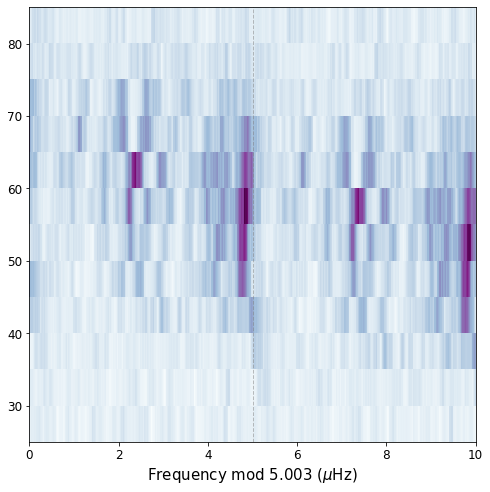

KIC 10918449
delta_nu = 3.676335148
nu_max = 38.59935048
returning dataframes


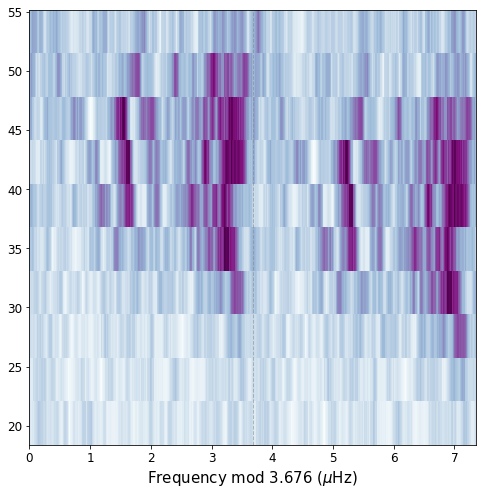

KIC 11044315
delta_nu = 5.237065516
nu_max = 61.6771031
returning dataframes


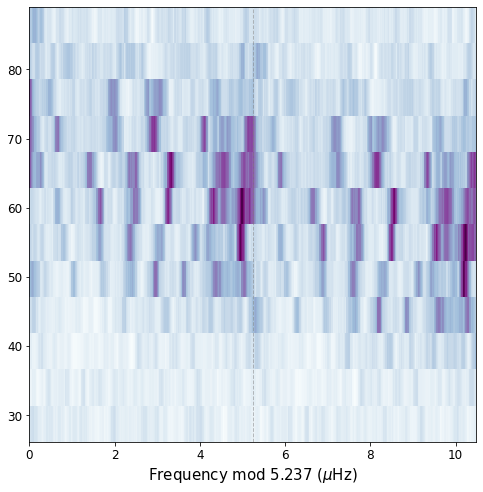

KIC 2834230
delta_nu = 7.063576148
nu_max = 86.87216418
returning dataframes


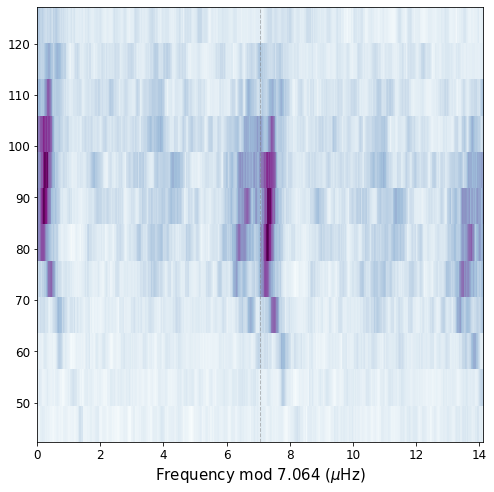

KIC 4273491
delta_nu = 5.700148012
nu_max = 70.22501162
returning dataframes


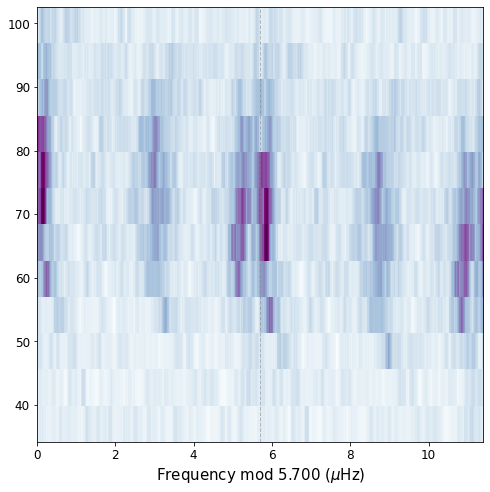

KIC 6694150
delta_nu = 6.421072606
nu_max = 79.77252397
returning dataframes


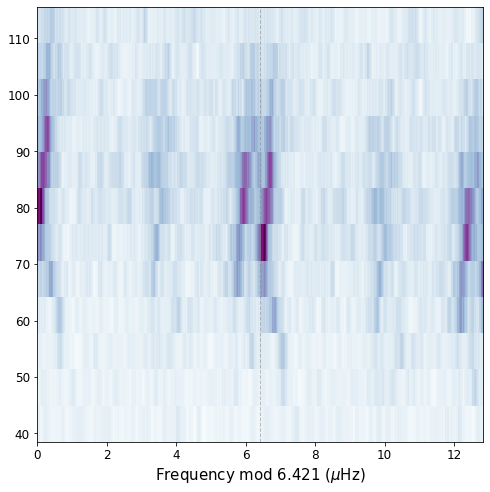

KIC 9468199
delta_nu = 4.886325191
nu_max = 57.54483356
returning dataframes


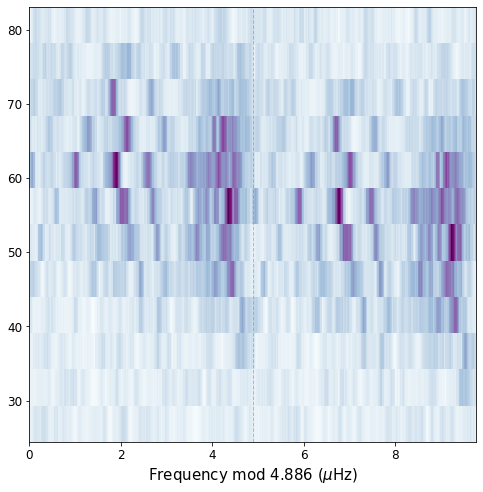

KIC 7901207
delta_nu = 6.491918062
nu_max = 81.65369012
returning dataframes


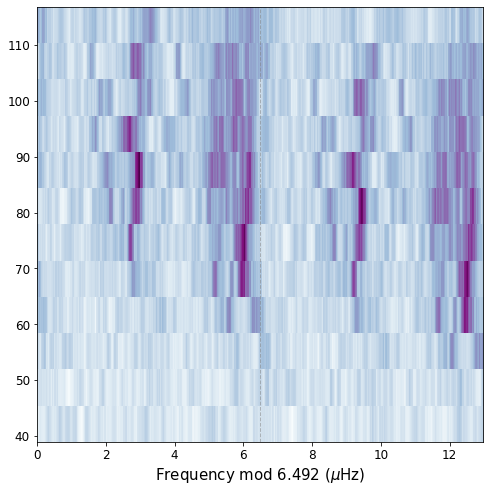

KIC 9612990
delta_nu = 5.141459349
nu_max = 59.11116173
returning dataframes


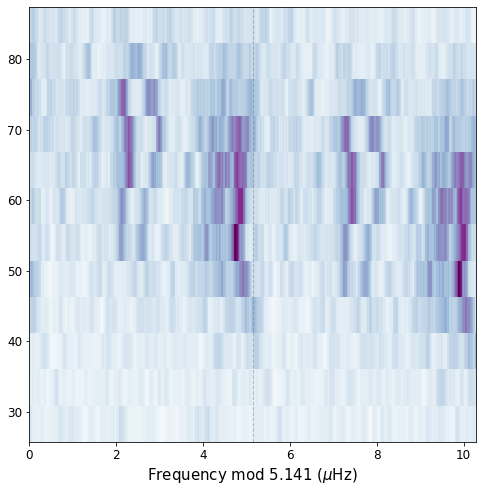

KIC 5380617
delta_nu = 4.044026179
nu_max = 43.84930897
returning dataframes


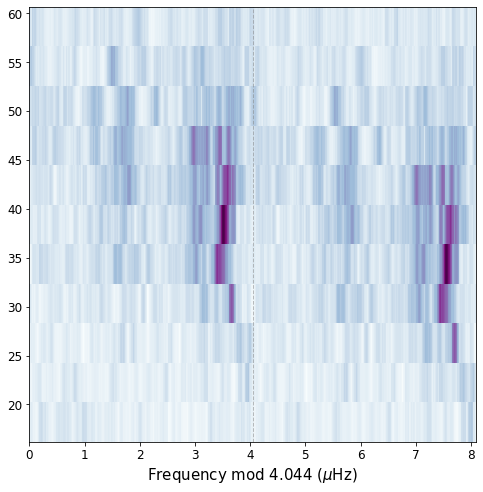

KIC 4372082
delta_nu = 6.229311355
nu_max = 79.37897776
returning dataframes


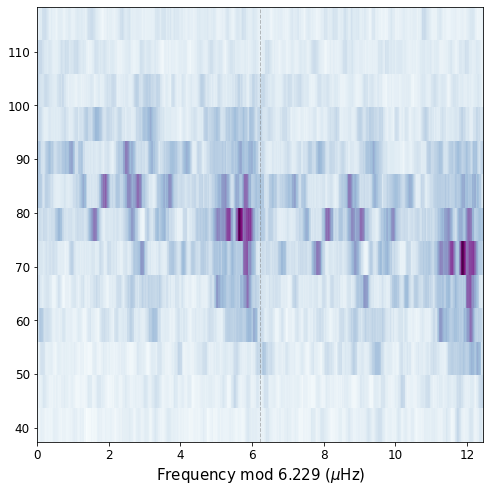

KIC 11405452
delta_nu = 4.718410579
nu_max = 52.60082713
returning dataframes


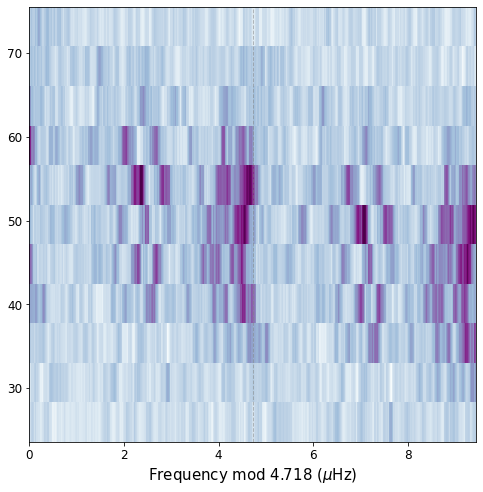

KIC 2158410
delta_nu = 4.290687885
nu_max = 46.83241728
returning dataframes


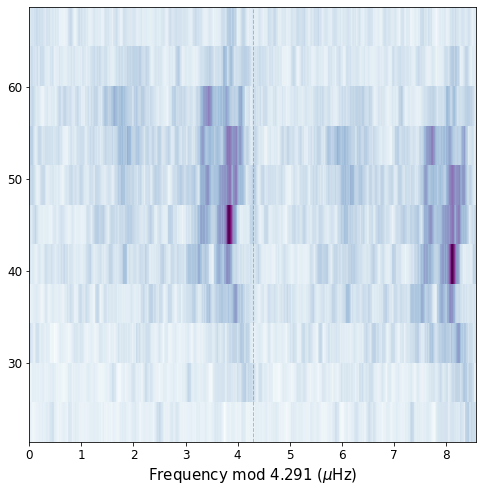

KIC 4055911
delta_nu = 5.243498646
nu_max = 59.64402266
returning dataframes


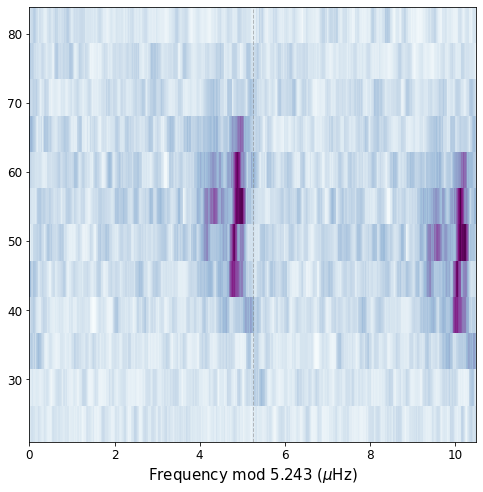

KIC 4756445
delta_nu = 6.124302753
nu_max = 74.50683206
returning dataframes


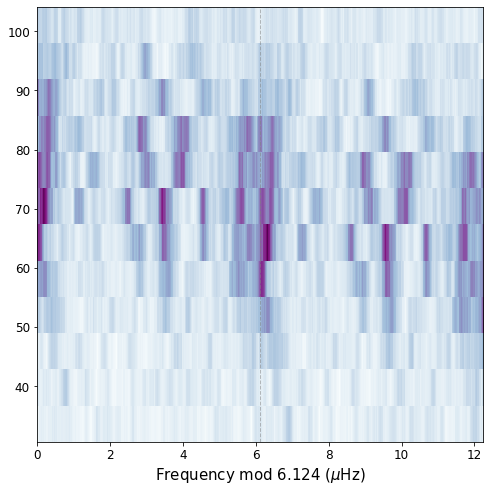

KIC 7757236
delta_nu = 5.563911775
nu_max = 61.92671851
returning dataframes


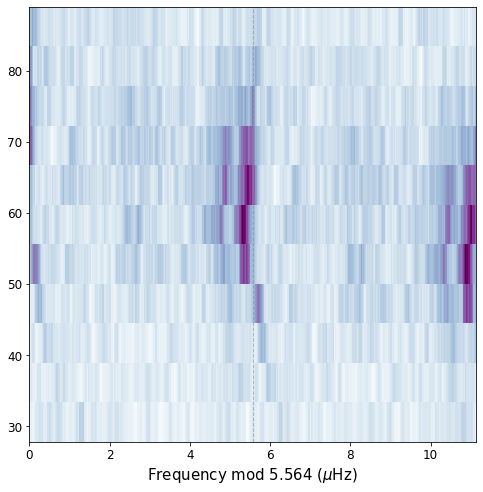

KIC 9451482
delta_nu = 6.689085281
nu_max = 81.85833032
returning dataframes


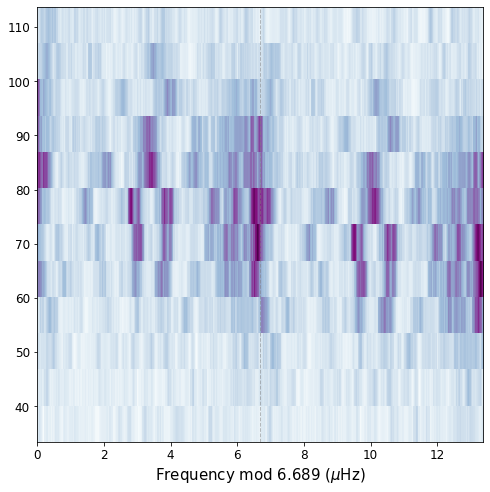

KIC 10809272
delta_nu = 5.231592463
nu_max = 59.06391959
returning dataframes


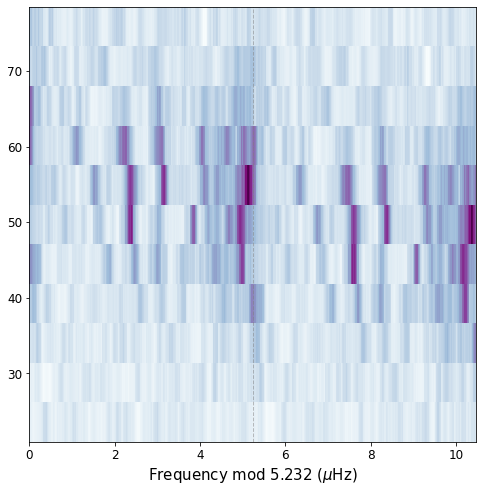

KIC 3432732
delta_nu = 6.414604814
nu_max = 80.42581978
returning dataframes


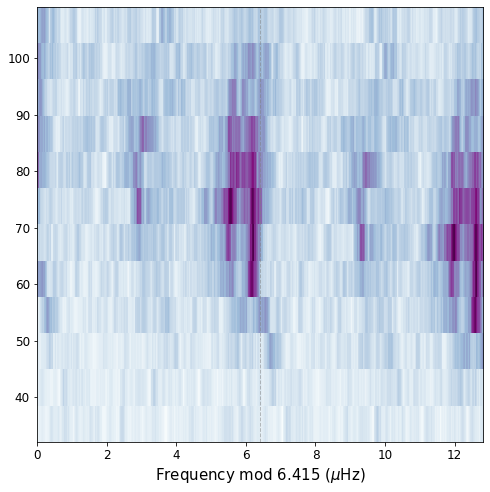

KIC 12164879
delta_nu = 4.786315047
nu_max = 54.38069006
returning dataframes


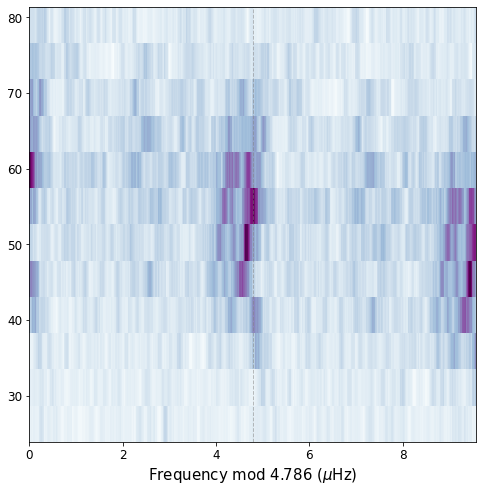

KIC 12453667
delta_nu = 7.707556098
nu_max = 99.17450813
returning dataframes


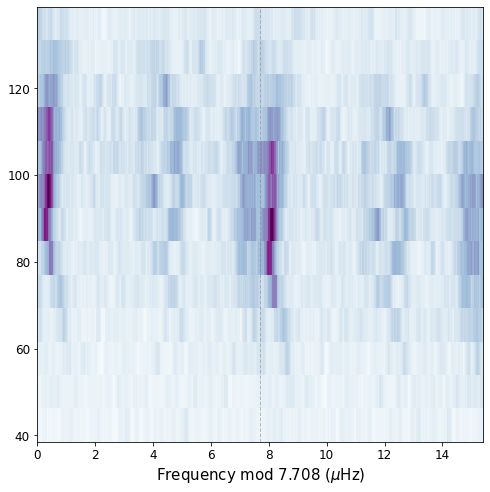

KIC 11619724
delta_nu = 2.486598524
nu_max = 23.65191048
returning dataframes


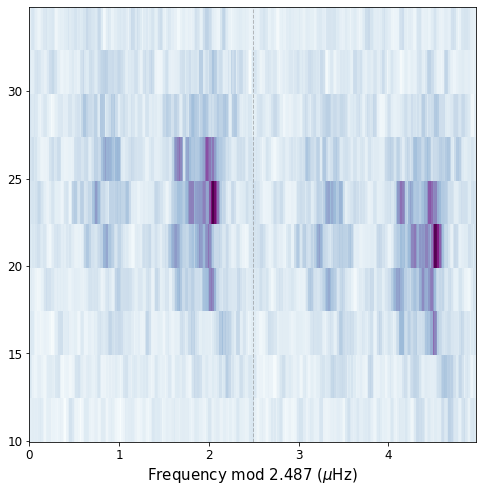

KIC 9786910
delta_nu = 2.384257616
nu_max = 22.36149255
returning dataframes


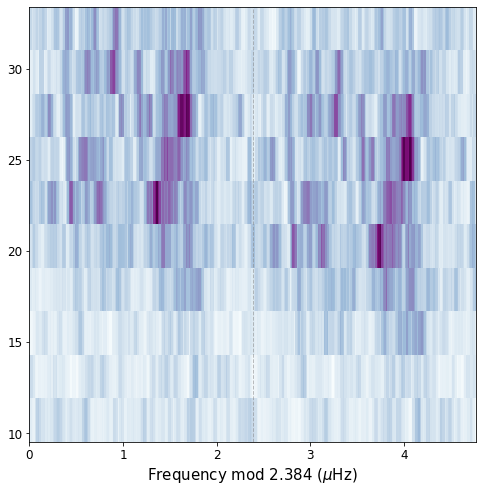

KIC 11456735
delta_nu = 7.007891798
nu_max = 90.28029054
returning dataframes


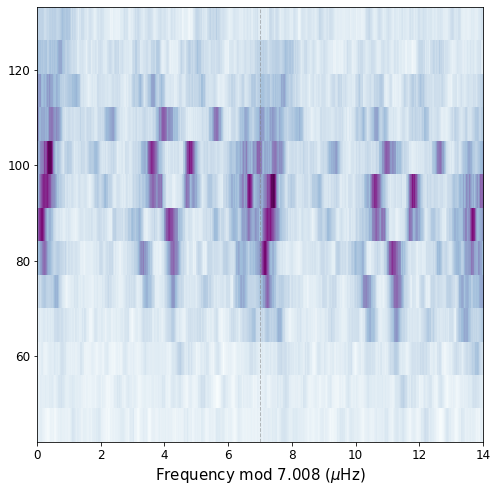

KIC 8025935
delta_nu = 5.865042095
nu_max = 70.48337297
returning dataframes


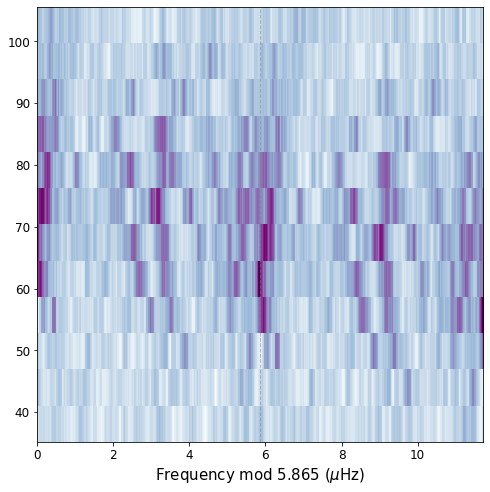

KIC 9266192
delta_nu = 6.340891835
nu_max = 88.65886875
returning dataframes


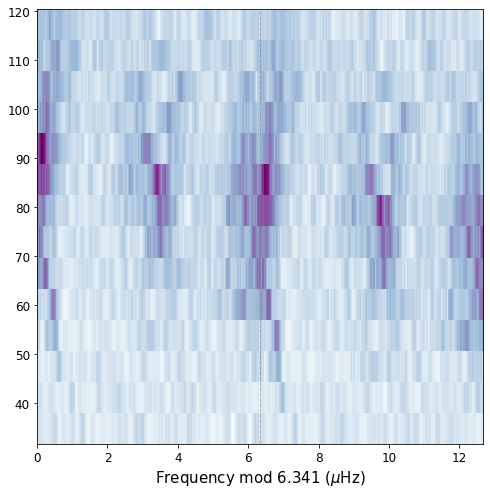

KIC 7350769
delta_nu = 7.104536459
nu_max = 88.94222959
returning dataframes


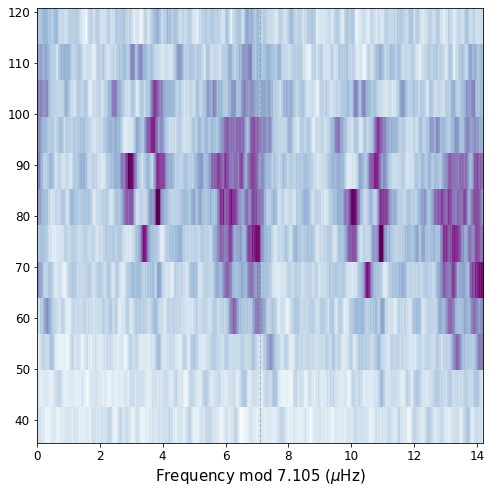

KIC 7581399
delta_nu = 6.595023163
nu_max = 83.28298191
returning dataframes


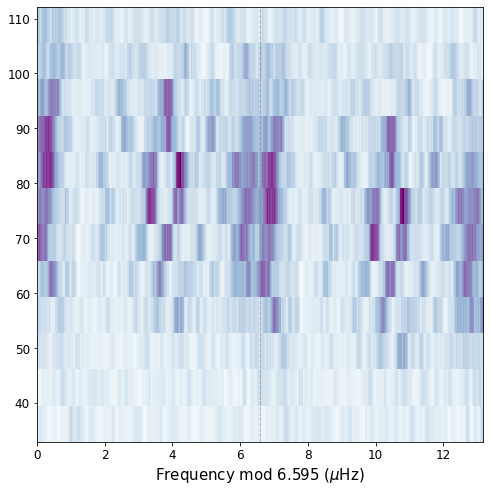

KIC 8508931
delta_nu = 5.018508331
nu_max = 59.4921547
returning dataframes


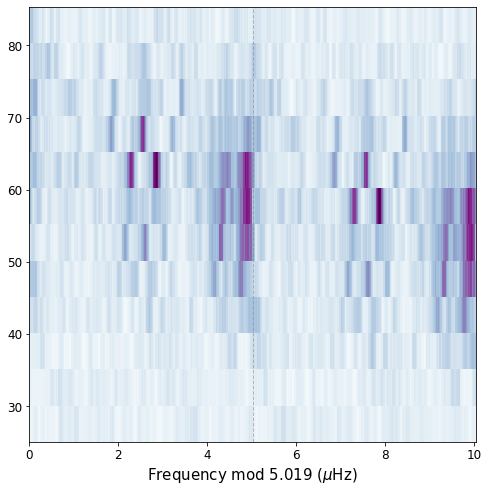

KIC 4940935
delta_nu = 3.810197694
nu_max = 39.93742509
returning dataframes


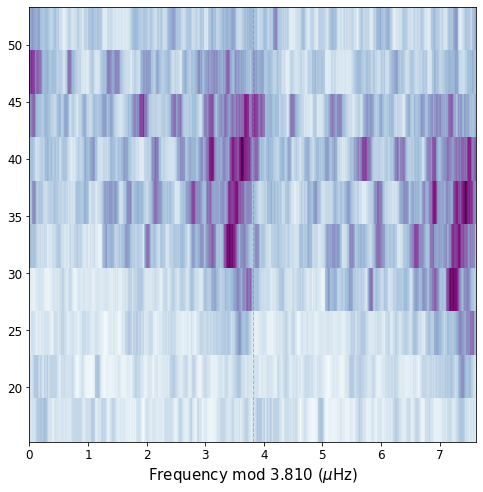

KIC 5534910
delta_nu = 8.153363217
nu_max = 109.4933995
returning dataframes


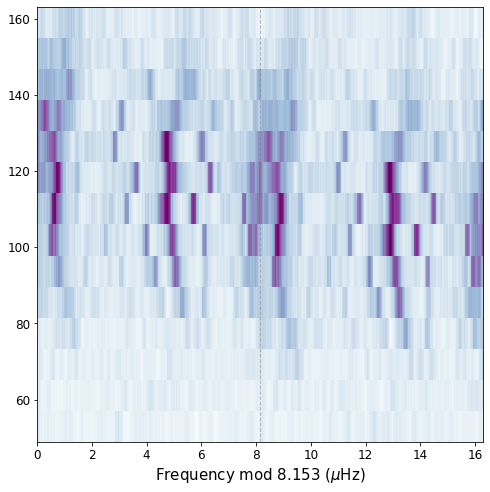

KIC 6756648
delta_nu = 6.697119666
nu_max = 81.67874551
returning dataframes


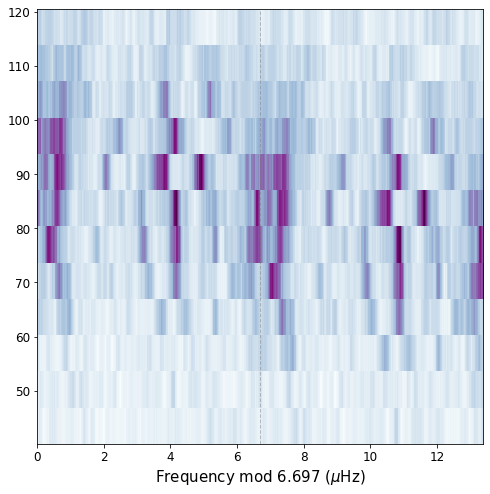

KIC 10989210
delta_nu = 4.679749528
nu_max = 51.84623263
returning dataframes


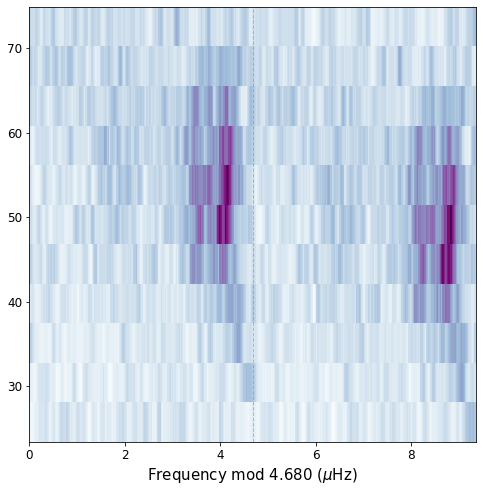

KIC 12020628
delta_nu = 6.977722738
nu_max = 88.41486408
returning dataframes


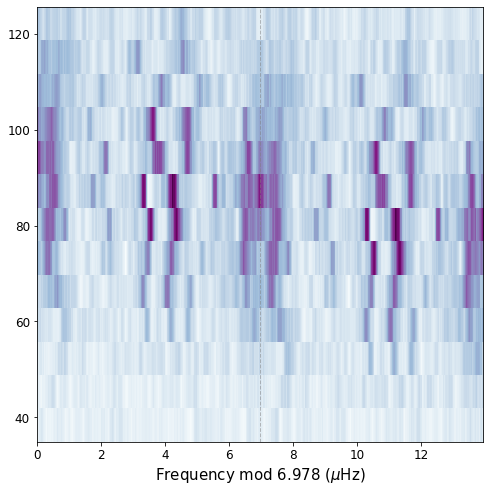

KIC 9846437
delta_nu = 1.734473101
nu_max = 15.56421253
returning dataframes


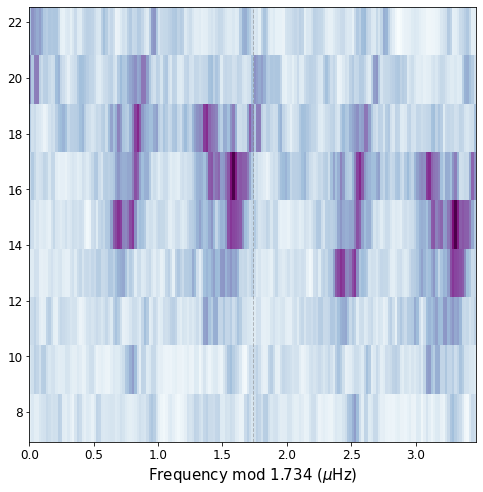

KIC 10621713
delta_nu = 3.372937979
nu_max = 34.86679298
returning dataframes


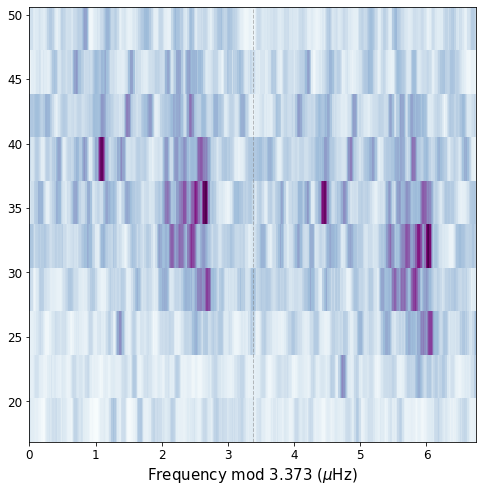

KIC 3758731
delta_nu = 6.24079082
nu_max = 75.87638623
returning dataframes


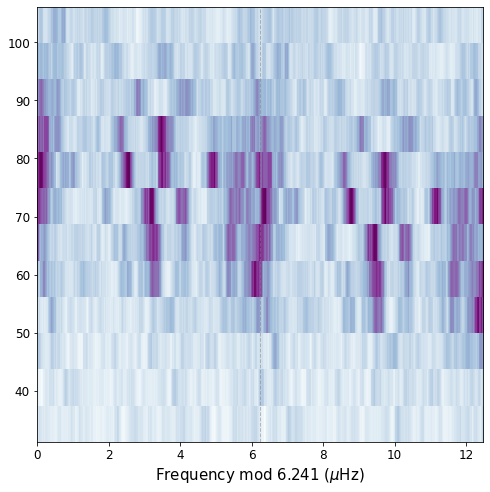

KIC 8395466
delta_nu = 5.694619199
nu_max = 67.36783606
returning dataframes


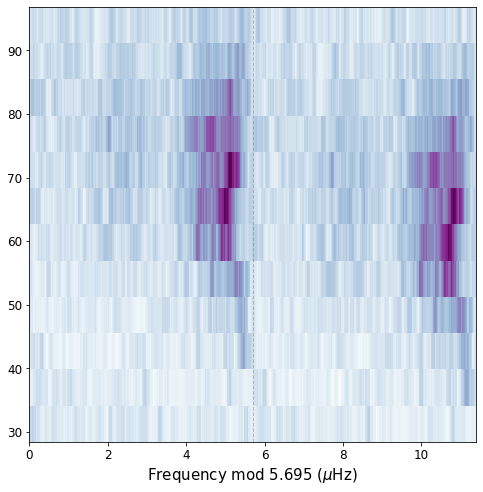

KIC 7052311
delta_nu = 4.717993959
nu_max = 52.81436978
returning dataframes


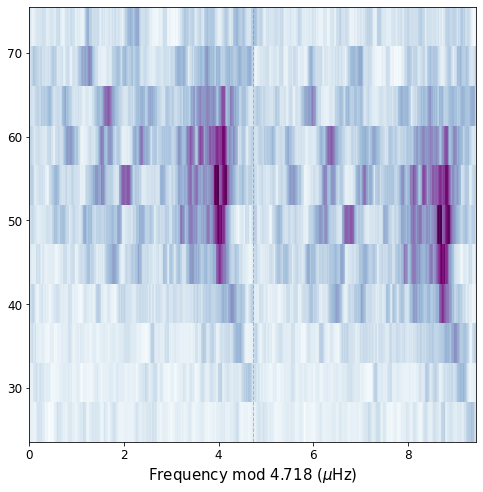

KIC 8107227
delta_nu = 6.077266666
nu_max = 72.8303057
returning dataframes


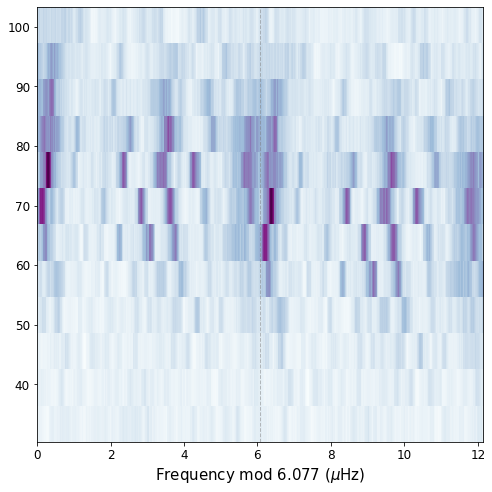

KIC 9655167
delta_nu = 8.051316798
nu_max = 104.7865362
returning dataframes


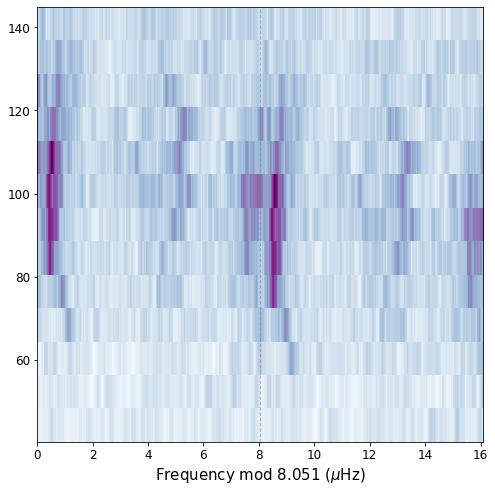

KIC 12603148
delta_nu = 4.84201334
nu_max = 56.26972714
returning dataframes


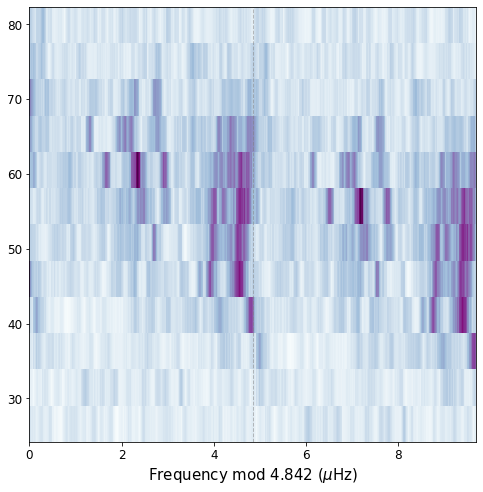

KIC 2984102
delta_nu = 5.581774708
nu_max = 64.8333809
returning dataframes


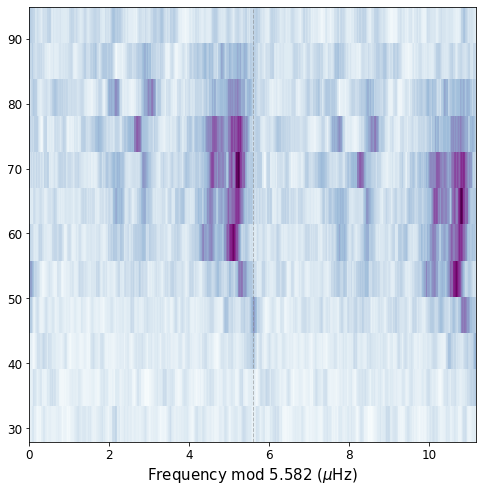

KIC 9655101
delta_nu = 7.882247257
nu_max = 99.86716532
returning dataframes


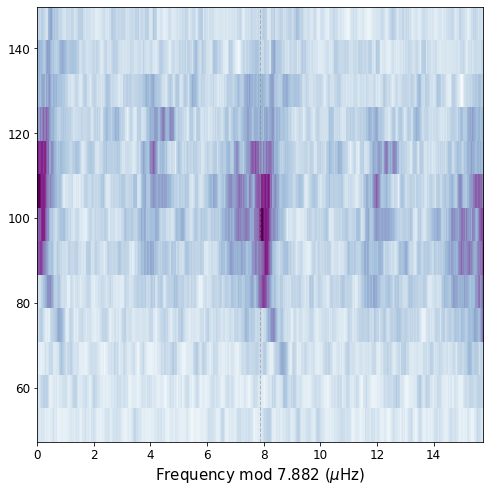

KIC 4179377
delta_nu = 2.697236328
nu_max = 25.89714969
returning dataframes


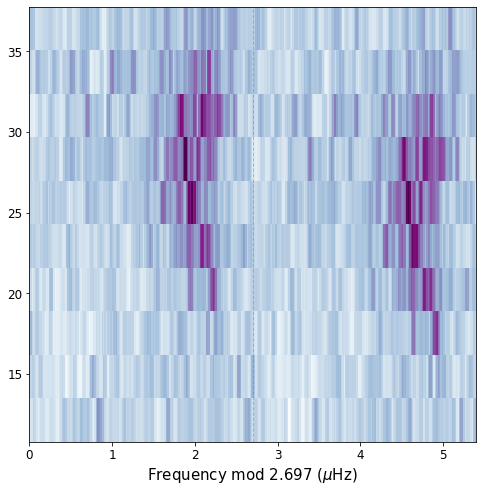

KIC 5707338
delta_nu = 6.396973955
nu_max = 80.64620586
returning dataframes


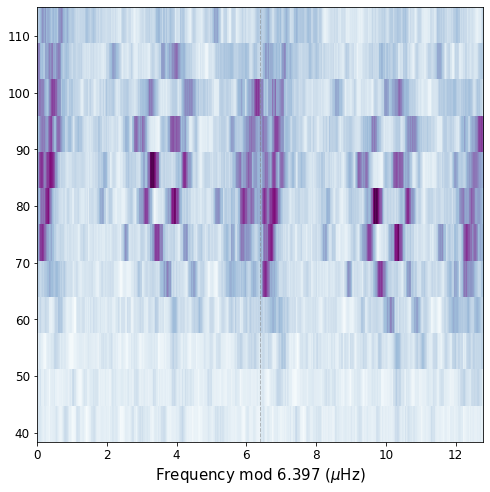

KIC 2845610
delta_nu = 7.107551257
nu_max = 92.31102247
returning dataframes


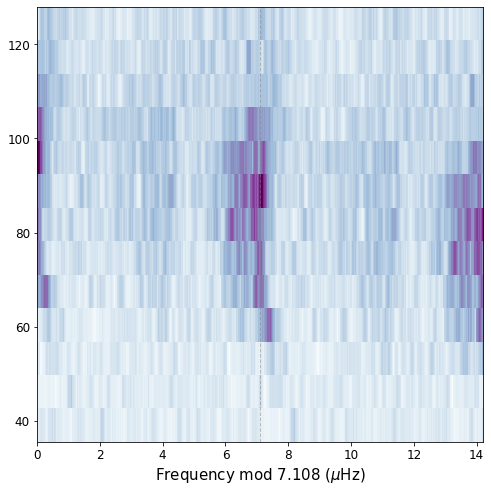

KIC 5104175
delta_nu = 7.076638518
nu_max = 89.39168558
returning dataframes


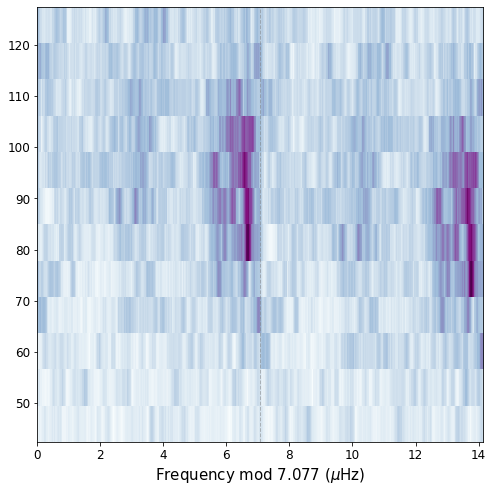

KIC 9836930
delta_nu = 5.946770798
nu_max = 73.26320704
returning dataframes


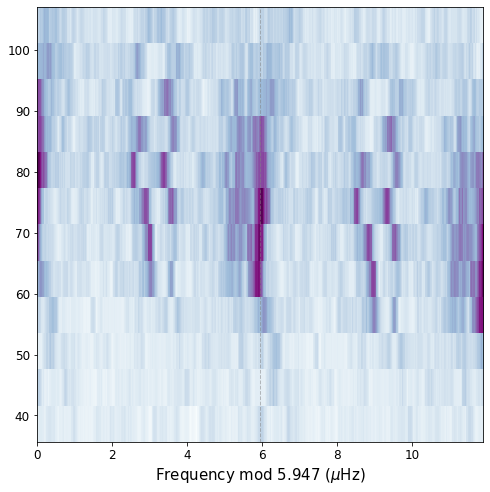

KIC 3660976
delta_nu = 3.85759814
nu_max = 40.22865258
returning dataframes


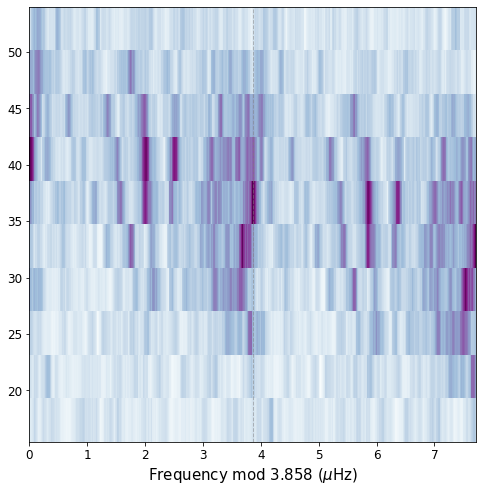

KIC 6382830
delta_nu = 2.518467343
nu_max = 22.92820582
returning dataframes


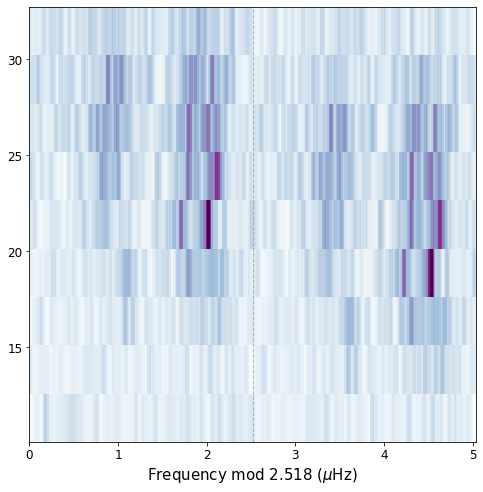

KIC 7708681
delta_nu = 6.319821556
nu_max = 78.45806749
returning dataframes


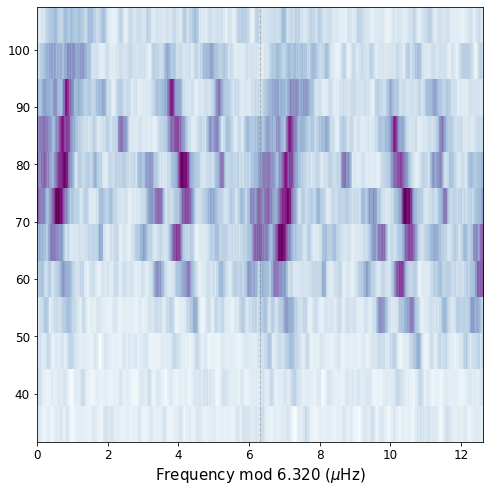

KIC 4651366
delta_nu = 4.652537294
nu_max = 52.62546739
returning dataframes


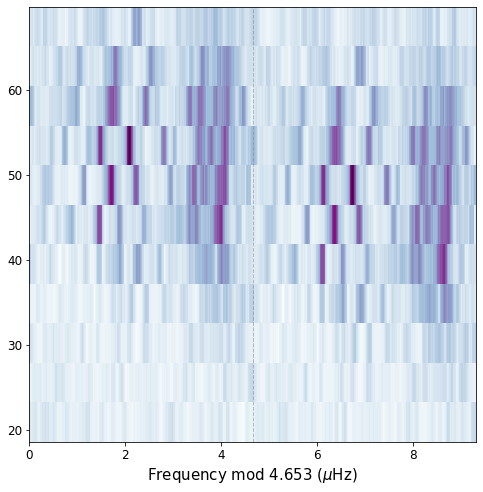

KIC 8232262
delta_nu = 5.978852802
nu_max = 73.49933923
returning dataframes


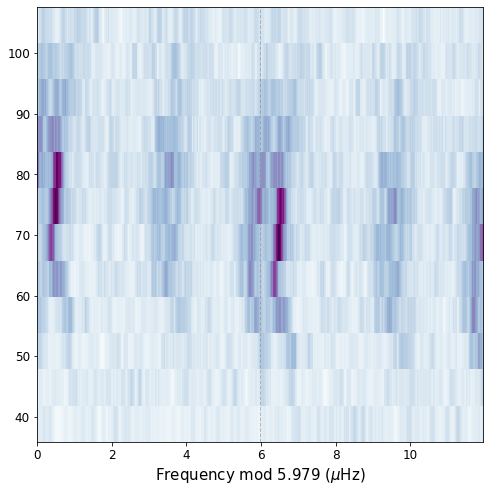

KIC 9226335
delta_nu = 4.53441698
nu_max = 50.42158496
returning dataframes


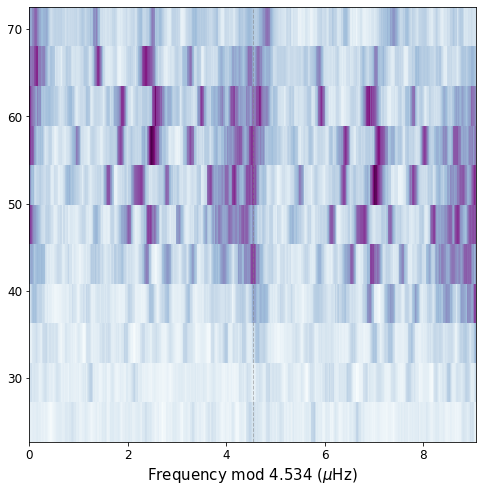

KIC 11045134
delta_nu = 4.384198363
nu_max = 49.83912925
returning dataframes


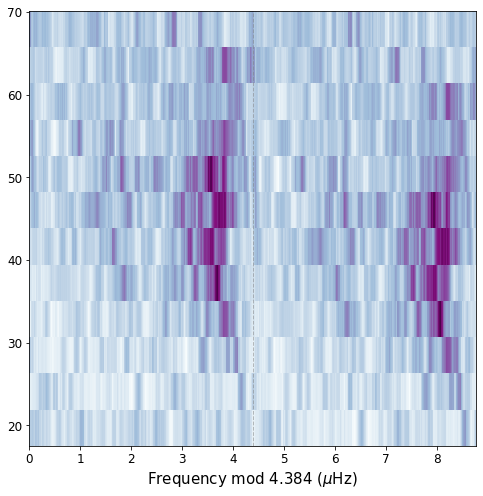

KIC 2860936
delta_nu = 7.643779893
nu_max = 98.32446318
returning dataframes


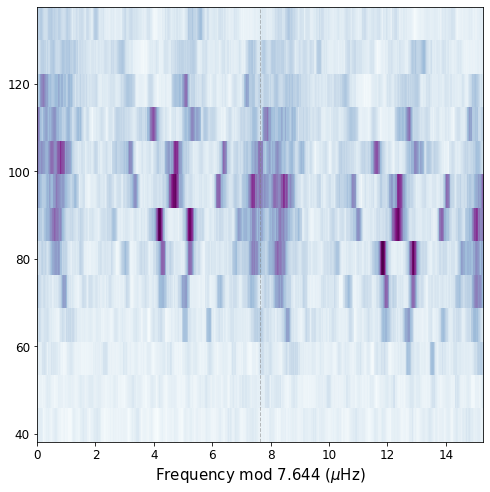

KIC 10162765
delta_nu = 6.801790911
nu_max = 85.50260178
returning dataframes


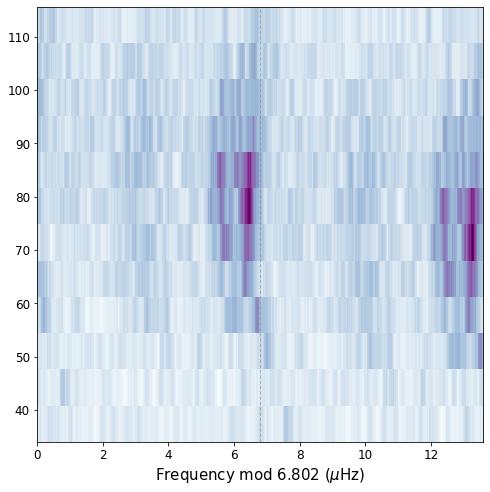

KIC 3430048
delta_nu = 3.518327282
nu_max = 33.62687497
returning dataframes


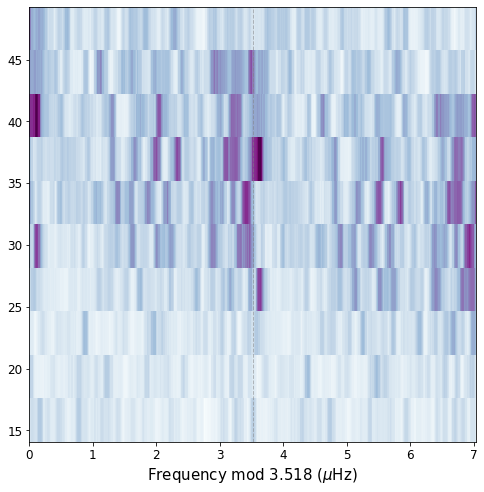

KIC 7116721
delta_nu = 4.514955516
nu_max = 50.98829849
returning dataframes


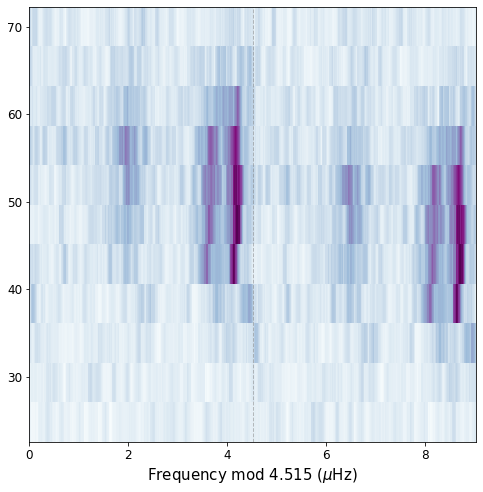

KIC 7347076
delta_nu = 7.217618953
nu_max = 90.71324193
returning dataframes


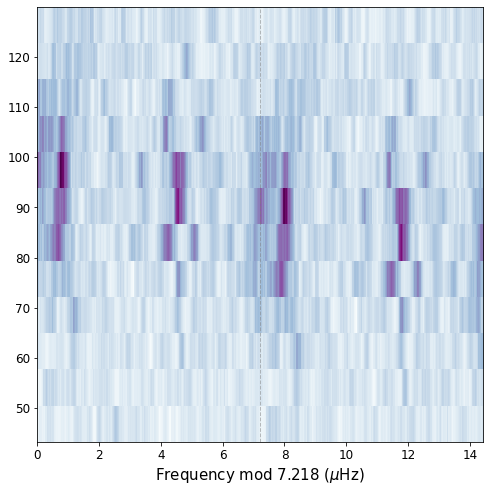

KIC 10163776
delta_nu = 6.166957297
nu_max = 74.76656675
returning dataframes


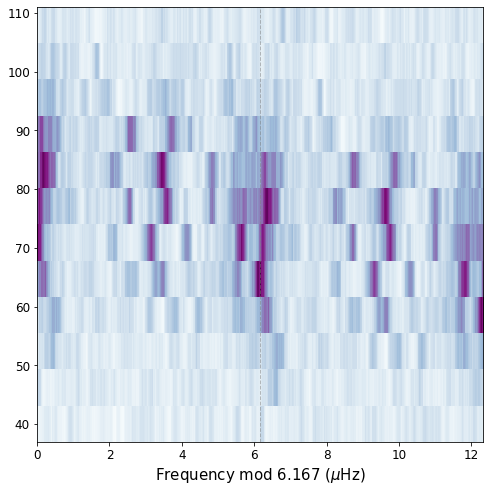

In [26]:
for i in range(0,len(highmass_rc_newvals)):
    star_name = 'KIC '+str(highmass_rc_newvals['KIC'][i])
    if star_name not in ['KIC 2579142','KIC 4060757']:
#         delta_nu,nu_max,lightcurve,powerspec = read_star_hp(star_name,suppress_output=False)
        delta_nu,nu_max,lightcurve,powerspec = read_star_bdps(star_name,suppress_output=False)
        echelle_wrapper(freq=np.asarray(powerspec['freq']),power=np.asarray(powerspec['power']),
                 dnu=delta_nu,
                 fmin=(0.5*nu_max),fmax=(1.5*nu_max),smooth_percent=0.02)
        plt.show()

In [20]:
i=47
star_name = 'KIC '+str(highmass_rc_newvals['KIC'][i])
delta_nu,nu_max,lightcurve,powerspec = read_star_hp(star_name,suppress_output=False)
delta_nu = 5.946
interact(echelle_wrapper,freq=fixed(np.asarray(powerspec['freq'])),power=fixed(np.asarray(powerspec['power'])),
         dnu=FloatSlider(min=delta_nu-0.5,max=delta_nu+0.5,step=0.005,value=delta_nu),
         fmin=fixed(0.5*nu_max),fmax=fixed(1.5*nu_max),smooth_percent=fixed(0.02))

KIC 11235672
delta_nu = 11.25990984
nu_max = 73.81417244
returning dataframes


interactive(children=(FloatSlider(value=5.946, description='dnu', max=6.446, min=5.446, step=0.005), Output())…

<function __main__.echelle_wrapper(freq, power, dnu, fmin, fmax, smooth_percent=0.02)>

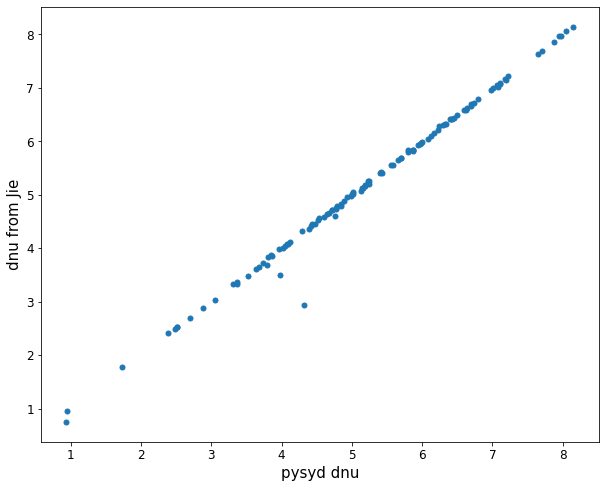

In [41]:
plt.scatter(highmass_rc_newvals['pysyd_dnu'],highmass_rc['Delnu'])
plt.ylabel('dnu from Jie')
plt.xlabel('pysyd dnu')
plt.show()

median frac difference: -0.001474884151067372


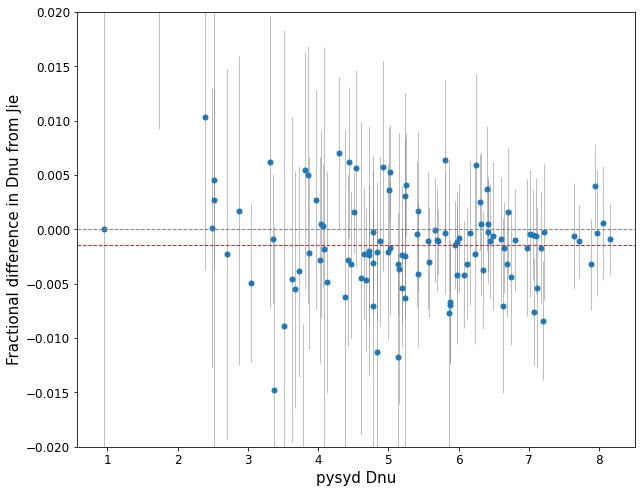

In [86]:
median_diff = np.nanmedian((highmass_rc['Delnu']-highmass_rc_newvals['pysyd_dnu'])/highmass_rc_newvals['pysyd_dnu'])
print('median frac difference:',median_diff)

plt.scatter(highmass_rc_newvals['pysyd_dnu'],(highmass_rc['Delnu']-highmass_rc_newvals['pysyd_dnu'])/highmass_rc_newvals['pysyd_dnu'])
plt.errorbar(highmass_rc_newvals['pysyd_dnu'],(highmass_rc['Delnu']-highmass_rc_newvals['pysyd_dnu'])/highmass_rc_newvals['pysyd_dnu'],
            yerr=highmass_rc['e_Delnu']/highmass_rc['Delnu'],
            linestyle='None',color='grey',zorder=0,alpha=0.5)
plt.ylabel('Fractional difference in Dnu from Jie')
plt.xlabel('pysyd Dnu')
plt.axhline(0,color='grey',linestyle='--')
plt.axhline(median_diff,color='tab:red',linestyle='--')
plt.ylim(bottom=-0.06)
plt.ylim(-0.02,0.02)
plt.show()

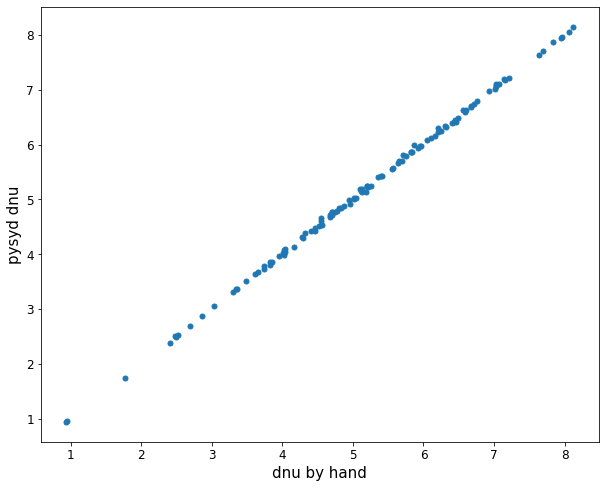

In [27]:
plt.scatter(highmass_rc_newvals['Delnu'],highmass_rc_newvals['pysyd_dnu'])
plt.xlabel('dnu by hand')
plt.ylabel('pysyd dnu')
plt.show()

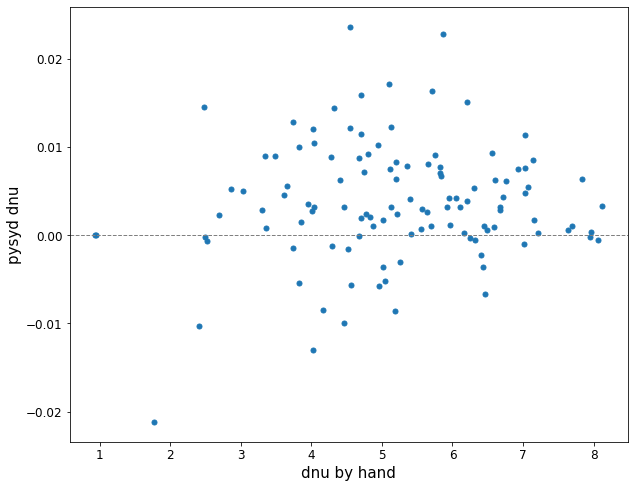

In [29]:
plt.scatter(highmass_rc_newvals['Delnu'],
            (highmass_rc_newvals['pysyd_dnu']-highmass_rc_newvals['Delnu'])/highmass_rc_newvals['Delnu'])
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('dnu by hand')
plt.ylabel('pysyd dnu')
# plt.ylim(top=0.06)
plt.show()

# Calculating masses

In [33]:
import asfgrid

In [34]:
s=asfgrid.Seism()

[[('logz', 'float64', ()), ('mass', 'float64', ()), ('evstate', 'float64', ()), ('logg_teff', 'float64', ()), ('logg', 'float64', ()), ('teff', 'float64', ()), ('fdnu', 'float64', ()), ('fdnu_int', 'float64', ()), ('mass_nu', 'float64', ()), ('age', 'float64', ()), ('dp', 'float64', ()), ('central_he4', 'float64', ()), ('model', 'int64', ())], [b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL']]
[[('logz', 'float64', ()), ('mass', 'float64', ()), ('evstate', 'float64', ()), ('logg_teff', 'float64', ()), ('logg', 'float64', ()), ('teff', 'float64', ()), ('fdnu', 'float64', ()), ('fdnu_int', 'float64', ()), ('mass_nu', 'float64', ()), ('age', 'float64', ()), ('dp', 'float64', ()), ('central_he4', 'float64', ()), ('model', 'int64', ())], [b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL', b'NULL']]


In [35]:
nu_max_solar = 3090 #uHz
delta_nu_solar = 135.1 #uHz
teff_solar = 5777 #K

def mass_uncorrected(nu_max, delta_nu, teff):
    mass = (nu_max/nu_max_solar)**(3) * (delta_nu/delta_nu_solar)**(-4) * (teff/teff_solar)**(1.5)
    return mass

def masserr_nofdnu(nu_max, delta_nu, teff, err_nu_max, err_delta_nu, err_teff, mass):
    inside_radical = (3*err_nu_max/nu_max)**2 + (4*err_delta_nu/delta_nu)**2 + ((3/2)*err_teff/teff)**2
    masserr = mass*np.sqrt(inside_radical)
    return masserr

def mass_corrected(nu_max, delta_nu, teff, fdnu):
    mass = (nu_max/nu_max_solar)**(3) * (delta_nu/(fdnu*delta_nu_solar))**(-4) * (teff/teff_solar)**(1.5)
    return mass

In [49]:
adjusted_masses = pd.DataFrame(columns=['KIC','a_fdnu','a_uncorr_mass','a_corr_mass','a_corr_mass_e',
                                        'L_fdnu','L_uncorr_mass','L_corr_mass','L_corr_mass_e',
                                        'j_fdnu','j_uncorr_mass','j_corr_mass','j_corr_mass_e',
                                        'g_fdnu','g_uncorr_mass','g_corr_mass','g_corr_mass_e',
                                        'gs_fdnu','gs_uncorr_mass','gs_corr_mass','gs_corr_mass_e'],
                               index=range(len(highmass_rc_newvals['KIC'])))

# ii=0
for i in range(0,len(highmass_rc)):
#     if highmass_rc_newvals['source'][i] == 'APOGEE':
    adjusted_masses['KIC'][i] = highmass_rc['KIC'][i]
#     print(highmass_rc['KIC'][i])

    ######### APOGEE MASSES #############
    mass = mass_uncorrected(highmass_rc_newvals['new_numax'][i],
                            highmass_rc_newvals['Delnu'][i],
                            highmass_rc_newvals['a_Teff'][i])
    adjusted_masses['a_uncorr_mass'][i] = mass
    try:
        dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
                                         highmass_rc_newvals['a_[Fe/H]'][i],
                                         highmass_rc_newvals['a_Teff'][i],
                                         mass,mass, #the second of these has mass loss but we're ignoring that
                                         highmass_rc_newvals['a_log(g)'][i],
                                         isfeh=True)
        adjusted_masses['a_fdnu'][i] = fdnu
        corr_mass = mass_corrected(highmass_rc_newvals['new_numax'][i],
                                    highmass_rc_newvals['Delnu'][i],
                                    highmass_rc_newvals['a_Teff'][i],
                                    fdnu)
        masserr = masserr_nofdnu(highmass_rc_newvals['new_numax'][i],
                                 highmass_rc_newvals['Delnu'][i],
                                 highmass_rc_newvals['a_Teff'][i],
                                 highmass_rc['e_numax'][i],# 2e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc['e_Delnu'][i],#1e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc_newvals['a_Teff_e'][i],
                                 corr_mass)
#         dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
#                                          highmass_rc_newvals['a_[Fe/H]'][i],
#                                          highmass_rc_newvals['a_Teff'][i],
#                                          mass,mass, #the second of these has mass loss but we're ignoring that
#                                          a_logg_derived[i],
#                                          isfeh=True)
#         adjusted_masses['a_gfdnu'][i] = fdnu
#         gcorr_mass = mass_corrected(highmass_rc_newvals['new_numax'][i],
#                                     highmass_rc_newvals['Delnu'][i],
#                                     highmass_rc_newvals['a_Teff'][i],
#                                     fdnu)
    except IndexError:
        adjusted_masses['a_fdnu'][i] = np.nan
#         adjusted_masses['a_gfdnu'][i] = np.nan
        corr_mass = np.nan
        masserr = np.nan
        gcorr_mass = np.nan
    adjusted_masses['a_corr_mass'][i] = corr_mass
    adjusted_masses['a_corr_mass_e'][i] = masserr
#     adjusted_masses['a_gcorr_mass'][i] = gcorr_mass
    
    ######### New Jie MASSES #############
    mass = mass_uncorrected(highmass_rc_newvals['new_numax'][i],
                            highmass_rc_newvals['Delnu'][i],
                            highmass_rc_newvals['o_Teff'][i])
    adjusted_masses['j_uncorr_mass'][i] = mass
    try:
        dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
                                         highmass_rc_newvals['o_[Fe/H]'][i],
                                         highmass_rc_newvals['o_Teff'][i],
                                         mass,mass, #the second of these has mass loss but we're ignoring that
                                         highmass_rc_newvals['o_log(g)'][i],
                                         isfeh=True)
        adjusted_masses['j_fdnu'][i] = fdnu
        corr_mass = mass_corrected(highmass_rc_newvals['new_numax'][i],
                                    highmass_rc_newvals['Delnu'][i],
                                    highmass_rc_newvals['o_Teff'][i],
                                    fdnu)
        masserr = masserr_nofdnu(highmass_rc_newvals['new_numax'][i],
                                 highmass_rc_newvals['Delnu'][i],
                                 highmass_rc_newvals['o_Teff'][i],
                                 highmass_rc['e_numax'][i],# 2e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc['e_Delnu'][i],#1e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc['e_Teff'][i],
                                 corr_mass)
        
    except IndexError:
        adjusted_masses['o_fdnu'][i] = np.nan
        corr_mass = np.nan
        masserr = np.nan
    adjusted_masses['j_corr_mass'][i] = corr_mass
    adjusted_masses['j_corr_mass_e'][i] = masserr
    
    ############ GAIA MASSES ###############
    mass = mass_uncorrected(highmass_rc_newvals['new_numax'][i],
                            highmass_rc_newvals['Delnu'][i],
                            highmass_rc_newvals['g_Teff'][i])
    adjusted_masses['g_uncorr_mass'][i] = mass
    try:
        dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
                                         highmass_rc_newvals['g_[M/H]'][i],
                                         highmass_rc_newvals['g_Teff'][i],
                                         mass,mass, #the second of these has mass loss but we're ignoring that
                                         highmass_rc_newvals['g_log(g)'][i],
                                         isfeh=True)
        adjusted_masses['g_fdnu'][i] = fdnu
        corr_mass = mass_corrected(highmass_rc_newvals['new_numax'][i],
                                    highmass_rc_newvals['Delnu'][i],
                                    highmass_rc_newvals['g_Teff'][i],
                                    fdnu)
        masserr = masserr_nofdnu(highmass_rc_newvals['new_numax'][i],
                                 highmass_rc_newvals['Delnu'][i],
                                 highmass_rc_newvals['g_Teff'][i],
                                 highmass_rc['e_numax'][i],# 2e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc['e_Delnu'][i],#1e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc_newvals['g_Teff_e'][i],
                                 corr_mass)
#         dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
#                                          highmass_rc_newvals['g_[M/H]'][i],
#                                          highmass_rc_newvals['g_Teff'][i],
#                                          mass,mass, #the second of these has mass loss but we're ignoring that
#                                          g_logg_derived[i],
#                                          isfeh=True)
#         adjusted_masses['g_gfdnu'][i] = fdnu
#         gcorr_mass = mass_corrected(highmass_rc_newvals['new_numax'][i],
#                                     highmass_rc_newvals['Delnu'][i],
#                                     highmass_rc_newvals['g_Teff'][i],
#                                     fdnu)
    except IndexError:
        adjusted_masses['g_fdnu'][i] = np.nan
#         adjusted_masses['g_gfdnu'][i] = np.nan
        corr_mass = np.nan
        masserr = np.nan
        gcorr_mass = np.nan
    adjusted_masses['g_corr_mass'][i] = corr_mass
    adjusted_masses['g_corr_mass_e'][i] = masserr
#     adjusted_masses['g_gcorr_mass'][i] = gcorr_mass
    
    ############ GAIA SPECTROSCOPIC MASSES ###############
    mass = mass_uncorrected(highmass_rc_newvals['new_numax'][i],
                            highmass_rc_newvals['Delnu'][i],
                            highmass_rc_newvals['gs_Teff'][i])
    adjusted_masses['gs_uncorr_mass'][i] = mass
    try:
        dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
                                         highmass_rc_newvals['gs_[Fe/H]'][i],
                                         highmass_rc_newvals['gs_Teff'][i],
                                         mass,mass, #the second of these has mass loss but we're ignoring that
                                         highmass_rc_newvals['gs_log(g)'][i],
                                         isfeh=True)
        adjusted_masses['gs_fdnu'][i] = fdnu
        corr_mass = mass_corrected(highmass_rc_newvals['new_numax'][i],
                                    highmass_rc_newvals['Delnu'][i],
                                    highmass_rc_newvals['gs_Teff'][i],
                                    fdnu)
        masserr = masserr_nofdnu(highmass_rc_newvals['new_numax'][i],
                                 highmass_rc_newvals['Delnu'][i],
                                 highmass_rc_newvals['gs_Teff'][i],
                                 highmass_rc['e_numax'][i],# 2e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc['e_Delnu'][i],#1e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc_newvals['gs_Teff_e'][i],
                                 corr_mass)
#         dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
#                                          highmass_rc_newvals['gs_[Fe/H]'][i],
#                                          highmass_rc_newvals['gs_Teff'][i],
#                                          mass,mass, #the second of these has mass loss but we're ignoring that
#                                          gs_logg_derived[i],
#                                          isfeh=True)
#         adjusted_masses['gs_gfdnu'][i] = fdnu
#         gcorr_mass = mass_corrected(highmass_rc_newvals['new_numax'][i],
#                                     highmass_rc_newvals['Delnu'][i],
#                                     highmass_rc_newvals['gs_Teff'][i],
#                                     fdnu)
    except IndexError:
        adjusted_masses['gs_fdnu'][i] = np.nan
#         adjusted_masses['gs_gfdnu'][i] = np.nan
        corr_mass = np.nan
        masserr = np.nan
        gcorr_mass = np.nan
    adjusted_masses['gs_corr_mass'][i] = corr_mass
    adjusted_masses['gs_corr_mass_e'][i] = masserr
#     adjusted_masses['gs_gcorr_mass'][i] = gcorr_mass
    
    ############ LAMOST MASSES ###############
    mass = mass_uncorrected(highmass_rc_newvals['new_numax'][i],
                            highmass_rc_newvals['Delnu'][i],
                            highmass_rc_newvals['L_Teff'][i])
    adjusted_masses['L_uncorr_mass'][i] = mass
    try:
        dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
                                         highmass_rc_newvals['L_[Fe/H]'][i],
                                         highmass_rc_newvals['L_Teff'][i],
                                         mass,mass, #the second of these has mass loss but we're ignoring that
                                         highmass_rc_newvals['L_log(g)'][i],
                                         isfeh=True)
        adjusted_masses['L_fdnu'][i] = fdnu
        corr_mass = mass_corrected(highmass_rc_newvals['new_numax'][i],
                                    highmass_rc_newvals['Delnu'][i],
                                    highmass_rc_newvals['L_Teff'][i],
                                    fdnu)
        masserr = masserr_nofdnu(highmass_rc_newvals['new_numax'][i],
                                 highmass_rc_newvals['Delnu'][i],
                                 highmass_rc_newvals['L_Teff'][i],
                                 highmass_rc['e_numax'][i],# 2e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc['e_Delnu'][i],#1e-2, #from Fig 6 of Jie Yu's paper
                                 highmass_rc_newvals['L_Teff_e'][i],
                                 corr_mass)
#         dnu,numax,fdnu = s.get_dnu_numax(1, #assuming a red clump star (bear with me)
#                                          highmass_rc_newvals['L_[Fe/H]'][i],
#                                          highmass_rc_newvals['L_Teff'][i],
#                                          mass,mass, #the second of these has mass loss but we're ignoring that
#                                          L_logg_derived[i],
#                                          isfeh=True)
#         adjusted_masses['L_gfdnu'][i] = fdnu
#         gcorr_mass = mass_corrected(highmass_rc_newvals['new_numax'][i],
#                                     highmass_rc_newvals['Delnu'][i],
#                                     highmass_rc_newvals['L_Teff'][i],
#                                     fdnu)
    except IndexError:
        adjusted_masses['L_fdnu'][i] = np.nan
#         adjusted_masses['L_gfdnu'][i] = np.nan
        corr_mass = np.nan
        masserr = np.nan
        gcorr_mass = np.nan
    adjusted_masses['L_corr_mass'][i] = corr_mass
    adjusted_masses['L_corr_mass_e'][i] = masserr
#     adjusted_masses['L_gcorr_mass'][i] = gcorr_mass
        
# adjusted_masses

outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp

outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1
outside interp range 1  out of  1


In [50]:
adjusted_masses

,KIC,a_fdnu,a_uncorr_mass,a_corr_mass,a_corr_mass_e,L_fdnu,L_uncorr_mass,L_corr_mass,L_corr_mass_e,j_fdnu,...,j_corr_mass,j_corr_mass_e,g_fdnu,g_uncorr_mass,g_corr_mass,g_corr_mass_e,gs_fdnu,gs_uncorr_mass,gs_corr_mass,gs_corr_mass_e
0,3347458,1.027232,4.484905,4.99376,0.680731,NaN,NaN,NaN,NaN,1.03777,...,5.423215,0.770519,NaN,NaN,NaN,NaN,1.012706,4.246364,4.466321,0.598001
1,8378545,1.025511,4.089198,4.522718,1.152732,1.032944,4.151199,4.725861,1.198926,1.033902,...,4.813188,1.225541,NaN,NaN,NaN,NaN,1.014711,3.914822,4.150319,1.05262
2,5978324,1.02653,4.086504,4.53773,0.275641,NaN,NaN,NaN,NaN,1.02697,...,4.545511,0.269216,NaN,NaN,NaN,NaN,1.036339,4.229311,4.878397,0.267727
3,10068490,1.012618,2.695859,2.834523,0.818954,1.014573,2.716576,2.878423,0.82792,1.010375,...,2.778112,0.801108,1.019167,3.102197,3.346959,0.962042,1.022452,2.775138,3.032891,0.873864
4,4756133,1.037179,4.201008,4.861471,0.436295,NaN,NaN,NaN,NaN,1.035632,...,4.785084,0.423736,NaN,NaN,NaN,NaN,1.019117,3.950818,4.261703,0.365146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10162765,1.005711,2.753529,2.816966,0.18589,1.010315,2.806094,2.923683,0.176171,1.00181,...,2.701144,0.181325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,3430048,0.990309,2.226199,2.141149,0.312692,NaN,NaN,NaN,NaN,1.006828,...,2.460677,0.360986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,7116721,NaN,NaN,NaN,NaN,0.994198,2.706808,2.644532,0.230218,1.002585,...,2.933537,0.285312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,7347076,NaN,NaN,NaN,NaN,1.003907,2.555362,2.595532,0.214123,1.023396,...,3.063258,0.284979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


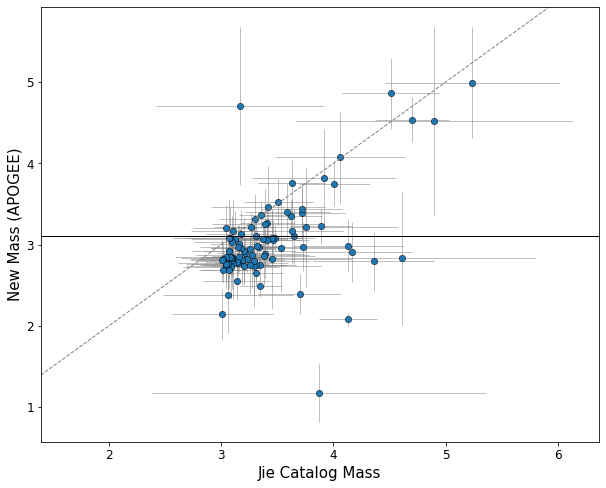

In [105]:
plt.scatter(highmass_rc['ClcorM'],adjusted_masses['a_corr_mass'],
            color='tab:blue',s=40,edgecolor='k',linewidth=0.5,label='APOGEE')
plt.errorbar(highmass_rc['ClcorM'],adjusted_masses['a_corr_mass'],
             xerr=highmass_rc['e_ClcorM'],yerr=adjusted_masses['a_corr_mass_e'],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
plt.axline((3, 3), slope=1,color='grey',linestyle='--') 
plt.axhline(3.1,color='k')
plt.xlabel('Jie Catalog Mass')
plt.ylabel('New Mass (APOGEE)')
plt.show()

median diff -0.09746161883018906


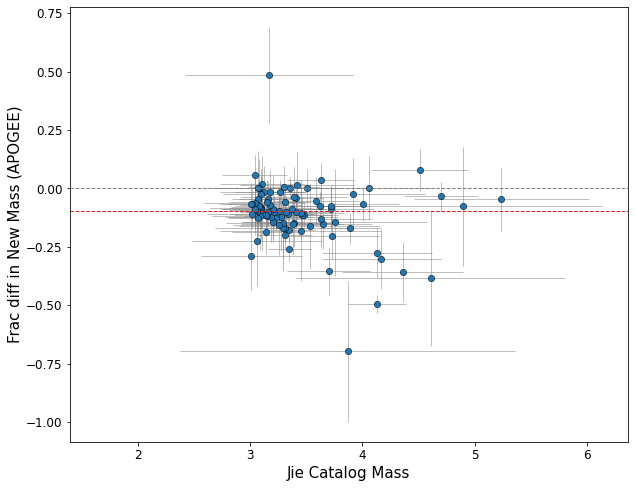

In [107]:
median_diff = np.nanmedian((adjusted_masses['a_corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'])
print('median diff',median_diff)

plt.scatter(highmass_rc['ClcorM'],(adjusted_masses['a_corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'],
            color='tab:blue',s=40,edgecolor='k',linewidth=0.5,label='APOGEE')
plt.errorbar(highmass_rc['ClcorM'],(adjusted_masses['a_corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'],
             xerr=highmass_rc['e_ClcorM'],yerr=adjusted_masses['a_corr_mass_e']/adjusted_masses['a_corr_mass'],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axline((3, 3), slope=1,color='grey',linestyle='--') 
plt.axhline(0,color='grey',linestyle='--')
plt.axhline(median_diff,color='tab:red',linestyle='--')
# plt.ylim(-0.25,0.1)
# plt.xlim(2.5,5)
plt.xlabel('Jie Catalog Mass')
plt.ylabel('Frac diff in New Mass (APOGEE)')
plt.show()

In [91]:
## What's the expected fractional difference in mass
print(np.sqrt((3*0.05)**2 + (4*0.02)**2 + ((3/2)*0.05))**2)
## roughly 5 percent?

0.10390000000000003


In [75]:
np.nanmedian(np.asarray(adjusted_masses['a_corr_mass_e'])/np.asarray(adjusted_masses['a_corr_mass']))

0.09131360052514398

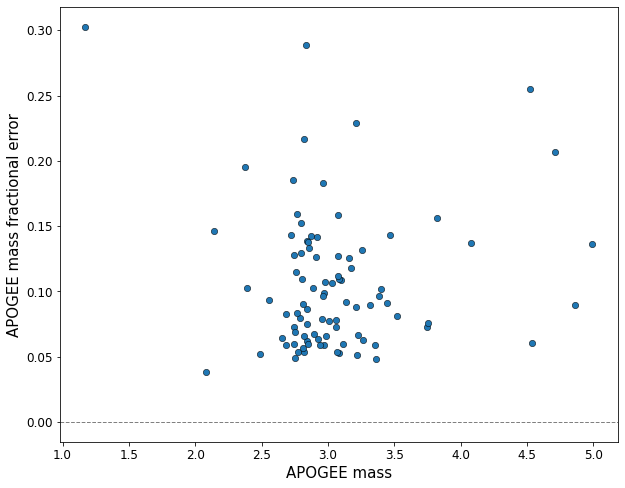

In [69]:
plt.scatter(adjusted_masses['a_corr_mass'],(adjusted_masses['a_corr_mass_e'])/adjusted_masses['a_corr_mass'],
            color='tab:blue',s=40,edgecolor='k',linewidth=0.5,label='APOGEE')
# plt.errorbar(highmass_rc['ClcorM'],(adjusted_masses['a_corr_mass']-highmass_rc['ClcorM'])/highmass_rc['ClcorM'],
#              xerr=highmass_rc['e_ClcorM'],yerr=adjusted_masses['a_corr_mass_e']/adjusted_masses['a_corr_mass'],
#              linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axline((3, 3), slope=1,color='grey',linestyle='--') 
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('APOGEE mass')
plt.ylabel('APOGEE mass fractional error')
plt.show()

In [103]:
## mask for if apogee or lamost greater than value
target_mass = 3.1
mask = np.where(np.logical_or(adjusted_masses['a_corr_mass'] > target_mass,adjusted_masses['L_corr_mass'] > target_mass),True,False)

## mask for if no apogee or lamost data
mask2 = np.where(np.logical_and(np.logical_and(adjusted_masses['a_corr_mass']!=adjusted_masses['a_corr_mass'],
                                              adjusted_masses['L_corr_mass']!=adjusted_masses['L_corr_mass']),
                              adjusted_masses['j_corr_mass'] > target_mass),
                True,False)
## combine the masks
mask = mask | mask2
mask


# ## mask for if apogee greater than value
# mask = np.where(adjusted_masses['a_corr_mass'] > 3.0,True,False)
# mask

array([ True,  True,  True, False,  True,  True, False, False, False,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False,  True, False, False,  True,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False])

In [104]:
adjusted_masses[mask]

,KIC,a_fdnu,a_uncorr_mass,a_corr_mass,a_corr_mass_e,L_fdnu,L_uncorr_mass,L_corr_mass,L_corr_mass_e,j_fdnu,...,j_corr_mass,j_corr_mass_e,g_fdnu,g_uncorr_mass,g_corr_mass,g_corr_mass_e,gs_fdnu,gs_uncorr_mass,gs_corr_mass,gs_corr_mass_e
0,3347458,1.027232,4.484905,4.99376,0.680731,NaN,NaN,NaN,NaN,1.03777,...,5.423215,0.770519,NaN,NaN,NaN,NaN,1.012706,4.246364,4.466321,0.598001
1,8378545,1.025511,4.089198,4.522718,1.152732,1.032944,4.151199,4.725861,1.198926,1.033902,...,4.813188,1.225541,NaN,NaN,NaN,NaN,1.014711,3.914822,4.150319,1.05262
2,5978324,1.02653,4.086504,4.53773,0.275641,NaN,NaN,NaN,NaN,1.02697,...,4.545511,0.269216,NaN,NaN,NaN,NaN,1.036339,4.229311,4.878397,0.267727
4,4756133,1.037179,4.201008,4.861471,0.436295,NaN,NaN,NaN,NaN,1.035632,...,4.785084,0.423736,NaN,NaN,NaN,NaN,1.019117,3.950818,4.261703,0.365146
5,7175316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.011674,...,3.496303,0.755407,1.007521,3.254459,3.353478,0.710382,0.996649,3.092821,3.05157,0.646452
10,6599955,NaN,NaN,NaN,NaN,1.03482,3.794413,4.351151,0.210526,1.011677,...,3.604852,0.255284,1.005092,3.384602,3.45407,0.165075,1.02488,3.568458,3.937072,0.191279
11,3955502,1.023045,3.720219,4.075189,0.558131,1.018294,3.645859,3.920056,0.532769,1.026942,...,4.180413,0.567358,NaN,NaN,NaN,NaN,1.014033,3.56551,3.769896,0.50537
12,8037930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.016173,...,3.279109,0.296962,0.982938,2.518372,2.350849,0.176207,NaN,NaN,NaN,NaN
13,8569885,1.025673,3.382724,3.743708,0.271784,1.026172,3.376886,3.744534,0.252617,1.029093,...,3.847507,0.272805,1.010566,3.21439,3.352413,0.225087,1.005741,3.155633,3.228722,0.216873
16,11518639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.033675,...,4.524578,0.663488,1.000889,3.475358,3.487732,0.475594,NaN,NaN,NaN,NaN


In [96]:
sorted_masses = adjusted_masses.sort_values(by=['a_corr_mass'],axis=0,ascending=False,ignore_index=True)
sorted_masses

,KIC,a_fdnu,a_uncorr_mass,a_corr_mass,a_corr_mass_e,L_fdnu,L_uncorr_mass,L_corr_mass,L_corr_mass_e,j_fdnu,...,j_corr_mass,j_corr_mass_e,g_fdnu,g_uncorr_mass,g_corr_mass,g_corr_mass_e,gs_fdnu,gs_uncorr_mass,gs_corr_mass,gs_corr_mass_e
0,3347458,1.027232,4.484905,4.99376,0.680731,NaN,NaN,NaN,NaN,1.03777,...,5.423215,0.770519,NaN,NaN,NaN,NaN,1.012706,4.246364,4.466321,0.598001
1,4756133,1.037179,4.201008,4.861471,0.436295,NaN,NaN,NaN,NaN,1.035632,...,4.785084,0.423736,NaN,NaN,NaN,NaN,1.019117,3.950818,4.261703,0.365146
2,9266192,1.035747,4.092484,4.709788,0.971943,NaN,NaN,NaN,NaN,1.030542,...,4.565255,0.963707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5978324,1.02653,4.086504,4.53773,0.275641,NaN,NaN,NaN,NaN,1.02697,...,4.545511,0.269216,NaN,NaN,NaN,NaN,1.036339,4.229311,4.878397,0.267727
4,8378545,1.025511,4.089198,4.522718,1.152732,1.032944,4.151199,4.725861,1.198926,1.033902,...,4.813188,1.225541,NaN,NaN,NaN,NaN,1.014711,3.914822,4.150319,1.05262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,12020628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.022819,...,3.207226,0.35692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,10621713,NaN,NaN,NaN,NaN,1.017684,3.219461,3.453305,0.301485,1.012795,...,3.358166,0.335023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,7708681,NaN,NaN,NaN,NaN,1.004162,2.757563,2.803757,0.137331,1.012753,...,2.995303,0.197153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,7116721,NaN,NaN,NaN,NaN,0.994198,2.706808,2.644532,0.230218,1.002585,...,2.933537,0.285312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
sorted_masses.iloc[41]

KIC               10547065
a_fdnu            1.000453
a_uncorr_mass     2.967279
a_corr_mass       2.972659
a_corr_mass_e     0.293603
L_fdnu            0.998548
L_uncorr_mass     2.929255
L_corr_mass        2.91228
L_corr_mass_e     0.275965
j_fdnu            1.020288
j_uncorr_mass     3.266724
j_corr_mass       3.540002
j_corr_mass_e     0.378957
g_fdnu            0.992749
g_uncorr_mass     2.883245
g_corr_mass       2.800529
g_corr_mass_e      0.26575
gs_fdnu                NaN
gs_uncorr_mass         NaN
gs_corr_mass           NaN
gs_corr_mass_e         NaN
Name: 41, dtype: object